 **Librerias necesarias para trabajar los datos ** 

In [3]:
!pip install geopandas
!pip install sweetviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import pandas as pd
import numpy as np
import datetime
import csv
import matplotlib.pyplot  as plt
import sweetviz as sv
import IPython
from scipy.stats import binom
import geopandas as gpd
from shapely.geometry import Point, Polygon
from fiona.drvsupport import supported_drivers
supported_drivers['LIBKML'] = 'rw'
import shapely
from scipy.stats import binom

from shapely.geometry import Point, LineString, Polygon

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials



# Descripción del problema

Las Enfermedades Transmitidas por Vectores (ETV) representan un importante problema de salud pública en México. Se estima que cerca de 60% del territorio nacional presenta condiciones que favorecen la transmisión de las ETV, en donde residen más de 50 millones de personas y se localiza la mayor parte de los centros agrícolas, ganaderos, industriales, pesqueros, petroleros y turísticos, de importancia para el país. Dentro de las ETVs, la más importante en México es el dengue. Es una arbovirosis asociada al ambiente urbano doméstico, a los hábitos de la población y a la carencia de servicios básicos como el suministro de agua, así como la falta de recolección de basura y deshechos de la vivienda.
En casos graves, el dengue puede complicarse convirtiéndose en dengue hemorrágico, cuando se presentan sangrados tanto internos como externos. O en shock hemorrágico, cuando la sangre no fluye a los órganos principales del cuerpo, lo que puede causar la muerte.

Para la vigilancia epidemiológica, promoción, prevención y control de las enfermedades transmitidas por vectores, El mosquito transmisor del dengue, Aedes aegypti, es un ejemplo de adaptación de una especie al ámbito humano, con criaderos, hábitats, fuente de alimentación y desplazamiento activos y pasivos ligados al entorno domiciliario. 
La enfermedad está condicionada en buena medida a la distribución del Aedes aegypti, que se reproduce en las viviendas de prácticamente todas las zonas urbanas del área de riesgo en México.

entre las actividades de promoción, prevención y control de las enfermedades transmitidas por vectores existe la “Vigilancia entomovirológica”, la cual consiste en la búsqueda y captura intradomiciliaria de adultos culícidos en localidades endémicas y no endémicas a dengue. Se seleccionará como mínimo el 4% del total de manzanas de la localidad,
procurando que la selección de las manzanas sea homogénea, no se podrán variar las manzanas seleccionadas en el trimestre anterior. La intención de esta vigilancia es bajo un enfoque preventivo.

 Estos mosquitos colectados se enviarán al laboratorio estatal para su identificación taxonómica. Esto es importante para poder definir a los mosquitos como vector del virus dengue o no, y tomar decisión sobre dónde priorizar áreas de trabajo en tiempo y recursos.


Descargar datos de colecta intradomiciliaria de mosquitos del año 2019 de un link en google Drive. El archivo se puede actualizar para ampliar en el tiempo la informacion 

In [5]:
auth.authenticate_user()

gauth = GoogleAuth()

gauth.credentials = GoogleCredentials.get_application_default()

drive = GoogleDrive(gauth)

fileDownloaded = drive.CreateFile({'id' :'1fc1dYGm7PYJ4ZLv1f1i7LdwAnnfYFgsz'})


In [6]:
fileDownloaded.GetContentFile('Hoja de trabajo Entomología 2019.xlsx')

Revisar la primera hoja del archivo excel de colecta intradomiciliaria de mosquitos del 2019

In [7]:
df = pd.read_excel('Hoja de trabajo Entomología 2019.xlsx', sheet_name='Hoja1')

df



/usr/local/lib/python3.8/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,Clave LESP,Fecha de recepción,Jurisdicción,Localidad,Sector,Manzana,Fecha de colecta,Fecha de diagnóstico,Diagnóstico,Hembra,Macho,Fecha de análisis (PCR/RAMP),Dengue,Chikungunya,Zika,Virus del Oeste del Nilo
0,1.0,190125.0,4.0,Guaymas,1050.0,15.0,190124.0,190131.0,Aedes vexans,2.0,1.0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Culex quinquefasciatus,1.0,1.0,NaN,NaN,NaN,NaN,NaN
2,2.0,190125.0,4.0,Guaymas,San Marino,Toscana,190124.0,190131.0,Aedes vexans,27.0,2.0,NaN,NaN,NaN,NaN,NaN
3,3.0,190125.0,4.0,Guaymas,Aranjuez,NaN,190124.0,190131.0,Culex quinquefasciatus,17.0,5.0,NaN,NaN,NaN,NaN,NaN
4,4.0,190305.0,1.0,Hermosillo,580.0,294.0,NaN,190306.0,Aedes aegypti,NaN,1.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1918,1293.0,191219.0,1.0,Hermosillo,351.0,13.0,191219.0,191220.0,Aedes aegypti,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1919,1294.0,191219.0,1.0,Hermosillo,351.0,33.0,191219.0,191220.0,Aedes aegypti,8.0,6.0,NaN,NaN,NaN,NaN,NaN
1920,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Culex quinquefasciatus,1.0,1.0,NaN,NaN,NaN,NaN,NaN
1921,1295.0,191219.0,1.0,Hermosillo,351.0,48.0,191219.0,191220.0,Aedes aegypti,2.0,2.0,NaN,NaN,NaN,NaN,NaN


# Analisis de datos de taxonomia de mosquitos en relacion a la temperatura a lo largo del tiempo

In [8]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1923 entries, 0 to 1922
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Clave LESP                    1287 non-null   float64
 1   Fecha de recepción            1287 non-null   float64
 2   Jurisdicción                  1287 non-null   float64
 3   Localidad                     1287 non-null   object 
 4   Sector                        1280 non-null   object 
 5   Manzana                       1286 non-null   object 
 6   Fecha de colecta              1286 non-null   float64
 7   Fecha de diagnóstico          1287 non-null   float64
 8   Diagnóstico                   1923 non-null   object 
 9   Hembra                        1504 non-null   float64
 10  Macho                         1422 non-null   float64
 11  Fecha de análisis (PCR/RAMP)  136 non-null    float64
 12  Dengue                        133 non-null    object 
 13  Chi

**Eliminar datos inesesarios para el analisis y que pueden ser de sensibles** 

In [9]:
df1= df.drop(columns =
              ['Dengue','Fecha de análisis (PCR/RAMP)','Chikungunya','Zika','Virus del Oeste del Nilo','Jurisdicción','Clave LESP','Manzana','Fecha de recepción','Fecha de diagnóstico', ])
df1

,Localidad,Sector,Fecha de colecta,Diagnóstico,Hembra,Macho
0,Guaymas,1050.0,190124.0,Aedes vexans,2.0,1.0
1,NaN,NaN,NaN,Culex quinquefasciatus,1.0,1.0
2,Guaymas,San Marino,190124.0,Aedes vexans,27.0,2.0
3,Guaymas,Aranjuez,190124.0,Culex quinquefasciatus,17.0,5.0
4,Hermosillo,580.0,NaN,Aedes aegypti,NaN,1.0
...,...,...,...,...,...,...
1918,Hermosillo,351.0,191219.0,Aedes aegypti,1.0,NaN
1919,Hermosillo,351.0,191219.0,Aedes aegypti,8.0,6.0
1920,NaN,NaN,NaN,Culex quinquefasciatus,1.0,1.0
1921,Hermosillo,351.0,191219.0,Aedes aegypti,2.0,2.0


**Rellenar dados faltantes**

In [10]:
df1 = df1.fillna(method="pad")
df1


,Localidad,Sector,Fecha de colecta,Diagnóstico,Hembra,Macho
0,Guaymas,1050.0,190124.0,Aedes vexans,2.0,1.0
1,Guaymas,1050.0,190124.0,Culex quinquefasciatus,1.0,1.0
2,Guaymas,San Marino,190124.0,Aedes vexans,27.0,2.0
3,Guaymas,Aranjuez,190124.0,Culex quinquefasciatus,17.0,5.0
4,Hermosillo,580.0,190124.0,Aedes aegypti,17.0,1.0
...,...,...,...,...,...,...
1918,Hermosillo,351.0,191219.0,Aedes aegypti,1.0,2.0
1919,Hermosillo,351.0,191219.0,Aedes aegypti,8.0,6.0
1920,Hermosillo,351.0,191219.0,Culex quinquefasciatus,1.0,1.0
1921,Hermosillo,351.0,191219.0,Aedes aegypti,2.0,2.0


**Cambiar el tipo de dato de Fecha de colecta de objeto a fecha**  

In [11]:
df1['Fecha de colecta'] = pd.to_datetime(df1['Fecha de colecta'], format='%y%m%d')  
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1923 entries, 0 to 1922
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Localidad         1923 non-null   object        
 1   Sector            1923 non-null   object        
 2   Fecha de colecta  1923 non-null   datetime64[ns]
 3   Diagnóstico       1923 non-null   object        
 4   Hembra            1923 non-null   float64       
 5   Macho             1923 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 90.3+ KB


**Filtra datos solo de la localidad de Hemoisllo para realizar el analisis**

In [12]:
df1_mask = df1['Localidad']=='Hermosillo'
df1h = df1[df1_mask]

df1h

,Localidad,Sector,Fecha de colecta,Diagnóstico,Hembra,Macho
4,Hermosillo,580.0,2019-01-24,Aedes aegypti,17.0,1.0
5,Hermosillo,580.0,2019-01-24,Culex quinquefasciatus,17.0,1.0
6,Hermosillo,538.0,2019-03-08,Aedes aegypti,1.0,1.0
7,Hermosillo,538.0,2019-03-08,Culex quinquefasciatus,2.0,1.0
8,Hermosillo,583.0,2019-03-08,Muestra Repetida,2.0,1.0
...,...,...,...,...,...,...
1918,Hermosillo,351.0,2019-12-19,Aedes aegypti,1.0,2.0
1919,Hermosillo,351.0,2019-12-19,Aedes aegypti,8.0,6.0
1920,Hermosillo,351.0,2019-12-19,Culex quinquefasciatus,1.0,1.0
1921,Hermosillo,351.0,2019-12-19,Aedes aegypti,2.0,2.0


In [13]:
df1h.rename(
    columns={"Fecha de colecta": "Fecha"}, 
    inplace=True
)
df1h

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,Localidad,Sector,Fecha,Diagnóstico,Hembra,Macho
4,Hermosillo,580.0,2019-01-24,Aedes aegypti,17.0,1.0
5,Hermosillo,580.0,2019-01-24,Culex quinquefasciatus,17.0,1.0
6,Hermosillo,538.0,2019-03-08,Aedes aegypti,1.0,1.0
7,Hermosillo,538.0,2019-03-08,Culex quinquefasciatus,2.0,1.0
8,Hermosillo,583.0,2019-03-08,Muestra Repetida,2.0,1.0
...,...,...,...,...,...,...
1918,Hermosillo,351.0,2019-12-19,Aedes aegypti,1.0,2.0
1919,Hermosillo,351.0,2019-12-19,Aedes aegypti,8.0,6.0
1920,Hermosillo,351.0,2019-12-19,Culex quinquefasciatus,1.0,1.0
1921,Hermosillo,351.0,2019-12-19,Aedes aegypti,2.0,2.0


In [14]:
df1h['MosquitosT'] = df1h['Hembra'] + df1h['Macho']
#dfth['MosquitosT'] = dfth['Hembra'] + dfth['Macho']

df1h.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1896 entries, 4 to 1922
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Localidad    1896 non-null   object        
 1   Sector       1896 non-null   object        
 2   Fecha        1896 non-null   datetime64[ns]
 3   Diagnóstico  1896 non-null   object        
 4   Hembra       1896 non-null   float64       
 5   Macho        1896 non-null   float64       
 6   MosquitosT   1896 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 118.5+ KB


<ipython-input-14-2626c3bd32f2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1h['MosquitosT'] = df1h['Hembra'] + df1h['Macho']


In [15]:
df1h_mask = df1h['Diagnóstico']=='Aedes aegypti'
dfaa = df1h[df1h_mask]
#dfth = dft[dft.Localidad.eq('Hermosillo')]
dfaa

,Localidad,Sector,Fecha,Diagnóstico,Hembra,Macho,MosquitosT
4,Hermosillo,580.0,2019-01-24,Aedes aegypti,17.0,1.0,18.0
6,Hermosillo,538.0,2019-03-08,Aedes aegypti,1.0,1.0,2.0
9,Hermosillo,580.0,2019-03-15,Aedes aegypti,2.0,1.0,3.0
10,Hermosillo,583.0,2019-03-15,Aedes aegypti,2.0,1.0,3.0
12,Hermosillo,490.0,2019-03-15,Aedes aegypti,1.0,1.0,2.0
...,...,...,...,...,...,...,...
1915,Hermosillo,336.0,2019-12-19,Aedes aegypti,7.0,2.0,9.0
1916,Hermosillo,336.0,2019-12-19,Aedes aegypti,3.0,2.0,5.0
1918,Hermosillo,351.0,2019-12-19,Aedes aegypti,1.0,2.0,3.0
1919,Hermosillo,351.0,2019-12-19,Aedes aegypti,8.0,6.0,14.0


In [16]:
dfaa2 = dfaa.groupby('Fecha').sum()
dfaa2

,Hembra,Macho,MosquitosT
Fecha,,,
2019-01-24,17.0,1.0,18.0
2019-03-08,1.0,1.0,2.0
2019-03-15,10.0,9.0,19.0
2019-03-21,4.0,6.0,10.0
2019-03-22,8.0,8.0,16.0
...,...,...,...
2019-12-13,58.0,44.0,102.0
2019-12-16,41.0,27.0,68.0
2019-12-17,40.0,24.0,64.0


In [17]:
df2 = df1h.groupby('Fecha').sum()
df2.info()
df2

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 167 entries, 2019-01-24 to 2019-12-19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Hembra      167 non-null    float64
 1   Macho       167 non-null    float64
 2   MosquitosT  167 non-null    float64
dtypes: float64(3)
memory usage: 5.2 KB


,Hembra,Macho,MosquitosT
Fecha,,,
2019-01-24,34.0,2.0,36.0
2019-03-08,5.0,3.0,8.0
2019-03-15,13.0,13.0,26.0
2019-03-21,11.0,15.0,26.0
2019-03-22,19.0,14.0,33.0
...,...,...,...
2019-12-13,91.0,46.0,137.0
2019-12-16,53.0,48.0,101.0
2019-12-17,48.0,28.0,76.0


In [18]:
df3 = pd.merge(df2, dfaa2["Hembra"], how="left", on="Fecha")

df3

,Hembra_x,Macho,MosquitosT,Hembra_y
Fecha,,,,
2019-01-24,34.0,2.0,36.0,17.0
2019-03-08,5.0,3.0,8.0,1.0
2019-03-15,13.0,13.0,26.0,10.0
2019-03-21,11.0,15.0,26.0,4.0
2019-03-22,19.0,14.0,33.0,8.0
...,...,...,...,...
2019-12-13,91.0,46.0,137.0,58.0
2019-12-16,53.0,48.0,101.0,41.0
2019-12-17,48.0,28.0,76.0,40.0


In [19]:
df3['PMosquitosAaH'] = (df3['Hembra_y'] / df3['MosquitosT'])*100

df3.describe()

,Hembra_x,Macho,MosquitosT,Hembra_y,PMosquitosAaH
count,167.000000,167.000000,167.000000,167.000000,167.000000
mean,43.173653,51.820359,94.994012,25.305389,28.027962
std,31.825386,42.692838,66.796625,22.674946,13.172498
min,3.000000,2.000000,5.000000,1.000000,0.793651
25%,18.500000,19.500000,43.000000,10.000000,17.658847
50%,38.000000,42.000000,84.000000,19.000000,27.472527
75%,57.500000,74.500000,135.500000,34.500000,37.553419
max,208.000000,294.000000,367.000000,117.000000,69.105691


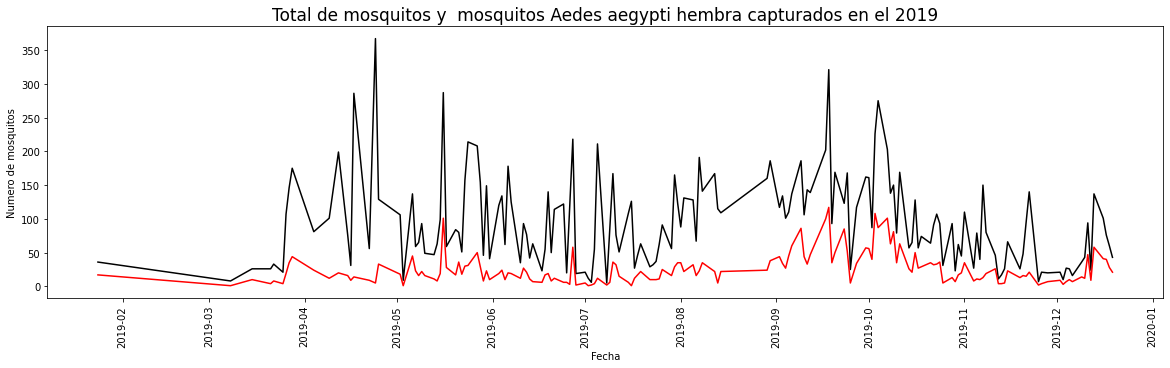

In [20]:
plt.figure(figsize=(20, 5))
#total de mosquitos
plt.plot ( df3['MosquitosT'],color="black")
#mosquitos Hembra de A. aegypti
plt.plot( df3['Hembra_y'],color="red")

plt.xlabel("Fecha")
plt.xticks(rotation = 90)
plt.ylabel("Numero de mosquitos")
plt.title('Total de mosquitos y  mosquitos Aedes aegypti hembra capturados en el 2019',fontsize = 17)
plt.show()

Base de datos generada de 

https://www.meteored.mx/hermosillo/historico

El archivo en Google Drive se puede actualizar para ampliar en el tiempo la informacion 


In [21]:
#https://drive.google.com/file/d/1u-0KhA0XPTMTNO7Cj20i85G6ceFLCvMf/view?usp=sharing
#https://drive.google.com/file/d/1Q0NICCaJUbX1f4eCqLrX6IMvDL2lwVXW/view?usp=sharing

In [22]:
auth.authenticate_user()

gauth = GoogleAuth()

gauth.credentials = GoogleCredentials.get_application_default()

drive = GoogleDrive(gauth)

fileDownloaded = drive.CreateFile({'id' :'1u-0KhA0XPTMTNO7Cj20i85G6ceFLCvMf'})


In [23]:
fileDownloaded.GetContentFile('Temperatura 2019.csv')

In [24]:
dfc = pd.read_csv('Temperatura 2019.csv')
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fecha             365 non-null    object 
 1   Temperatura Med.  365 non-null    float64
 2   Temperatura Max.  365 non-null    float64
 3   Temperatura Min.  365 non-null    float64
dtypes: float64(3), object(1)
memory usage: 11.5+ KB


In [25]:
dfc['Fecha'] = pd.to_datetime(dfc['Fecha'])  
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Fecha             365 non-null    datetime64[ns]
 1   Temperatura Med.  365 non-null    float64       
 2   Temperatura Max.  365 non-null    float64       
 3   Temperatura Min.  365 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 11.5 KB


In [26]:
dfc['Fecha'] = pd.to_datetime(dfc['Fecha'], format='%y%m%d')  
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Fecha             365 non-null    datetime64[ns]
 1   Temperatura Med.  365 non-null    float64       
 2   Temperatura Max.  365 non-null    float64       
 3   Temperatura Min.  365 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 11.5 KB


In [27]:
dfc2 = pd.merge(dfc, df3["PMosquitosAaH"], how="left", on=["Fecha"])
#df3
dfc2

,Fecha,Temperatura Med.,Temperatura Max.,Temperatura Min.,PMosquitosAaH
0,2019-01-01,13.0,20.0,8.0,NaN
1,2019-02-01,11.0,17.0,6.0,NaN
2,2019-03-01,10.0,23.0,1.0,NaN
3,2019-04-01,13.0,27.0,3.0,NaN
4,2019-05-01,16.0,25.0,8.0,NaN
...,...,...,...,...,...
360,2019-12-27,15.0,20.0,12.0,NaN
361,2019-12-28,12.0,18.0,7.0,NaN
362,2019-12-29,11.0,19.0,4.0,NaN
363,2019-12-30,11.0,21.0,4.0,NaN


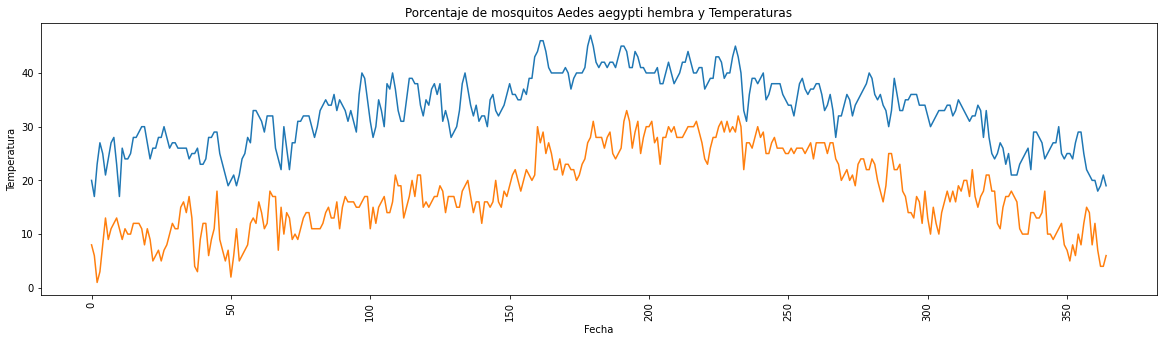

In [28]:

plt.figure(figsize=(20, 5))
plt.plot ( dfc2['Temperatura Max.'])
plt.plot( dfc2['Temperatura Min.'])
#plt.plot(dfc2['Fecha'], dfc2['PMosquitosAaH'])
#plt.twinx(dfc2['PMosquitosAaH'])

plt.xlabel("Fecha")
plt.xticks(rotation = 90)
plt.ylabel("Temperatura")
plt.title('Porcentaje de mosquitos Aedes aegypti hembra y Temperaturas')
plt.show()


<Figure size 7200x360 with 0 Axes>

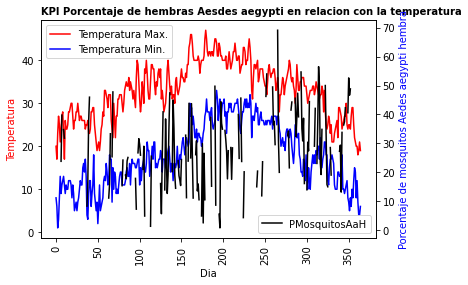

In [29]:
plt.figure(figsize=(100,5))
fig,ax = plt.subplots()
# make a plot
ax.plot(dfc2['Temperatura Max.'],
        color="red",label='Temperatura Max.')
ax.plot(dfc2['Temperatura Min.'],
        color="blue",label='Temperatura Min.')

# set x-axis label
ax.set_xlabel("Dia", fontsize = 10)
plt.xticks(rotation = 90)
# set y-axis label
ax.set_ylabel("Temperatura",
              color="red",
              fontsize=10,)
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot( dfc2['PMosquitosAaH'],color="black",label ='PMosquitosAaH')
ax2.set_ylabel("Porcentaje de mosquitos Aedes aegypti hembra",color="blue",)
ax.legend(loc = 'upper left')
ax2.legend(loc = 'lower right')
ax.set_title('KPI Porcentaje de hembras Aesdes aegypti en relacion con la temperatura', loc = "left", fontdict = {'fontsize':10, 'fontweight':'bold', 'color':'black'})
plt.savefig('TempMxMnPMHAa.jpeg')
plt.show()



In [30]:
df4= pd.merge(df3, dfc, how="left", on=["Fecha"])

df4.describe()

,Hembra_x,Macho,MosquitosT,Hembra_y,PMosquitosAaH,Temperatura Med.,Temperatura Max.,Temperatura Min.
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,43.173653,51.820359,94.994012,25.305389,28.027962,26.083832,33.994012,19.041916
std,31.825386,42.692838,66.796625,22.674946,13.172498,6.020460,6.153163,6.570611
min,3.000000,2.000000,5.000000,1.000000,0.793651,14.000000,17.000000,3.000000
25%,18.500000,19.500000,43.000000,10.000000,17.658847,22.000000,30.000000,15.000000
50%,38.000000,42.000000,84.000000,19.000000,27.472527,26.000000,34.000000,18.000000
75%,57.500000,74.500000,135.500000,34.500000,37.553419,31.000000,39.000000,25.000000
max,208.000000,294.000000,367.000000,117.000000,69.105691,38.000000,46.000000,31.000000


In [31]:
df4['Fecha'] = pd.to_datetime(df4['Fecha'], format='%y%m%d')  
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167 entries, 0 to 166
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Fecha             167 non-null    datetime64[ns]
 1   Hembra_x          167 non-null    float64       
 2   Macho             167 non-null    float64       
 3   MosquitosT        167 non-null    float64       
 4   Hembra_y          167 non-null    float64       
 5   PMosquitosAaH     167 non-null    float64       
 6   Temperatura Med.  167 non-null    float64       
 7   Temperatura Max.  167 non-null    float64       
 8   Temperatura Min.  167 non-null    float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 13.0 KB


Buscar una relacion en las variables de las temperaturas con respecto a los mosquitos 

In [32]:
analyze_report=sv.analyze(dfc2)
analyze_report.show_html('analyze.html', open_browser=True)


                                             |          | [  0%]   00:00 -> (? left)

Report analyze.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



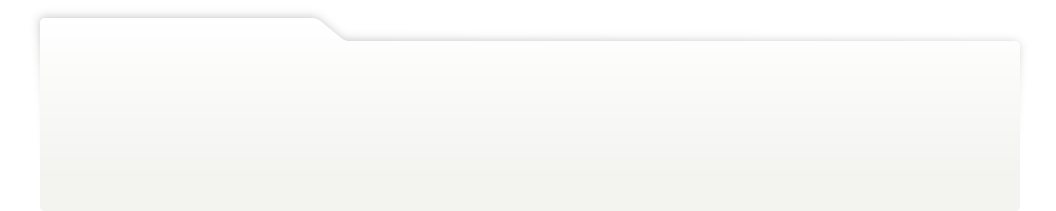
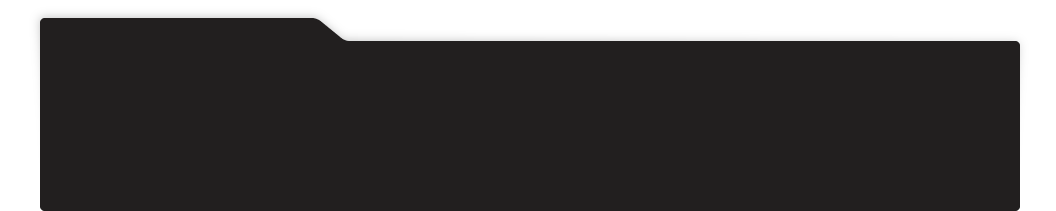
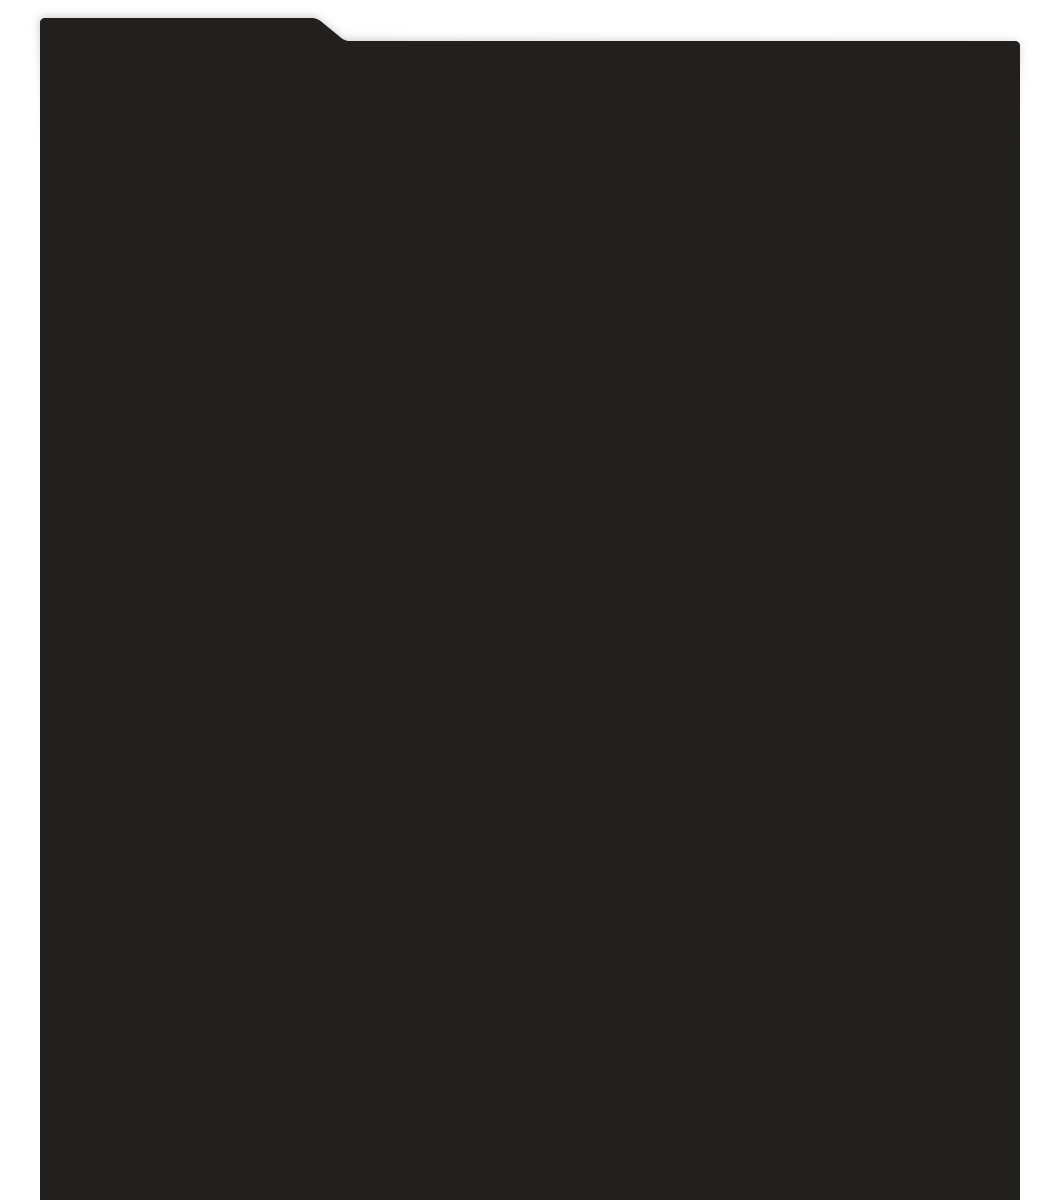
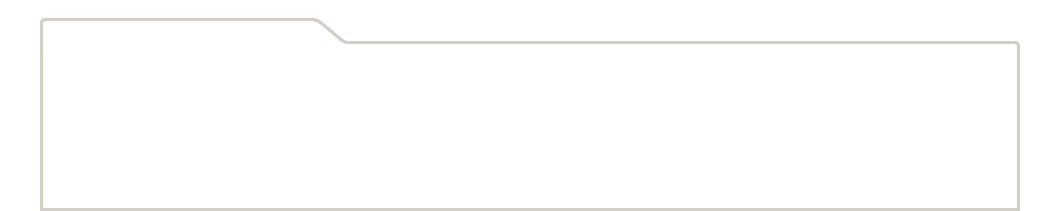
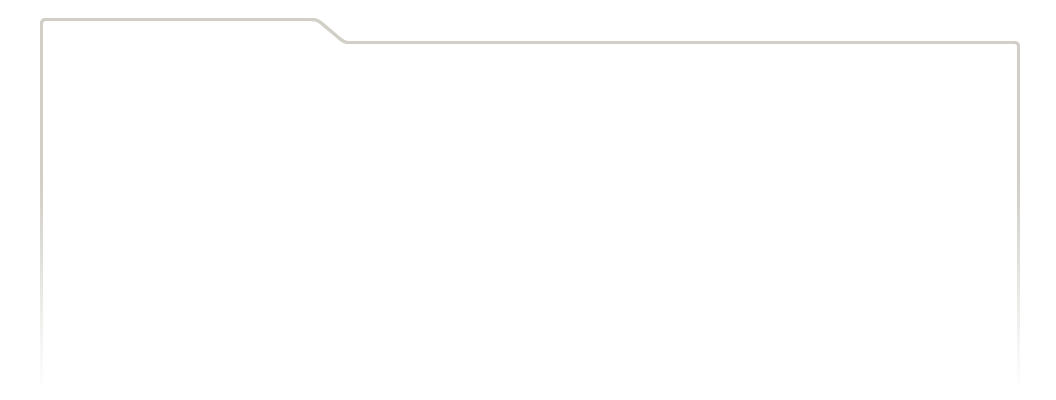
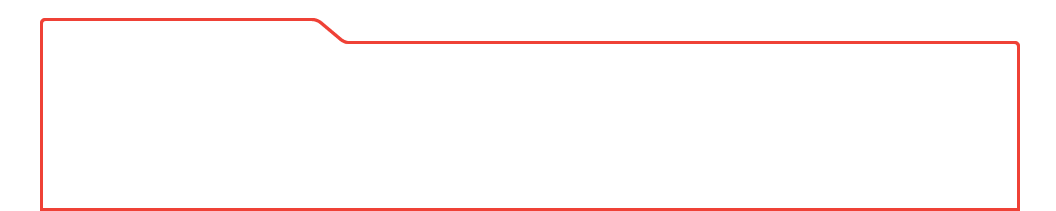
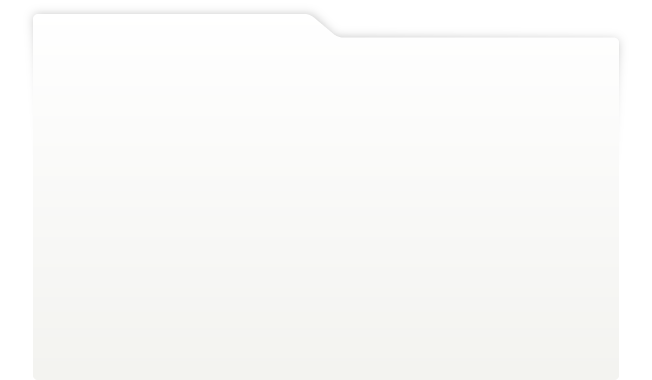
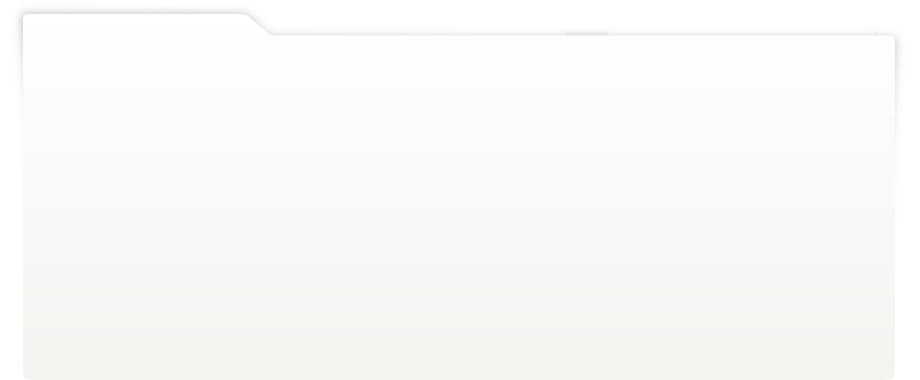
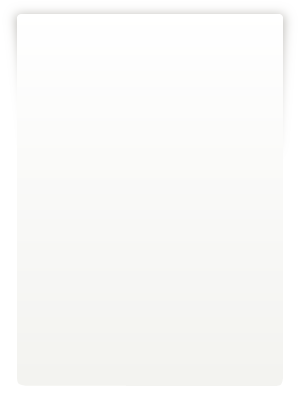
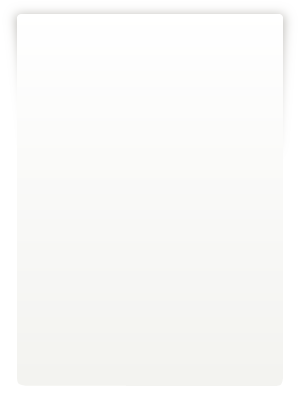
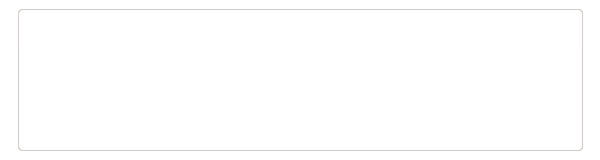
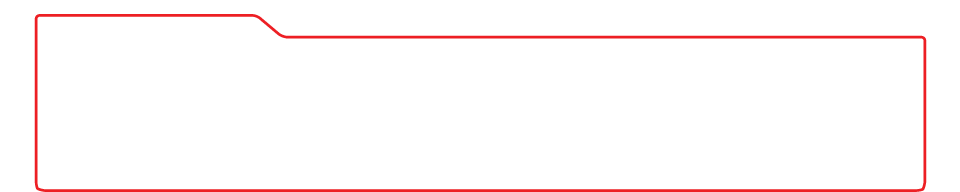
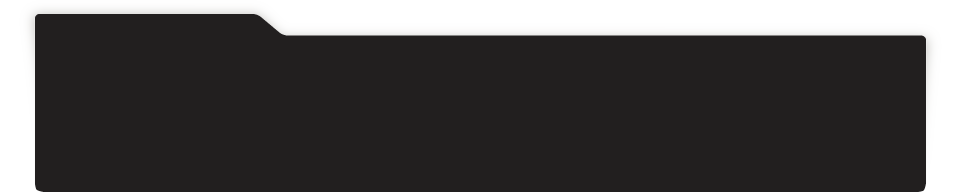
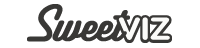
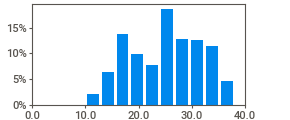
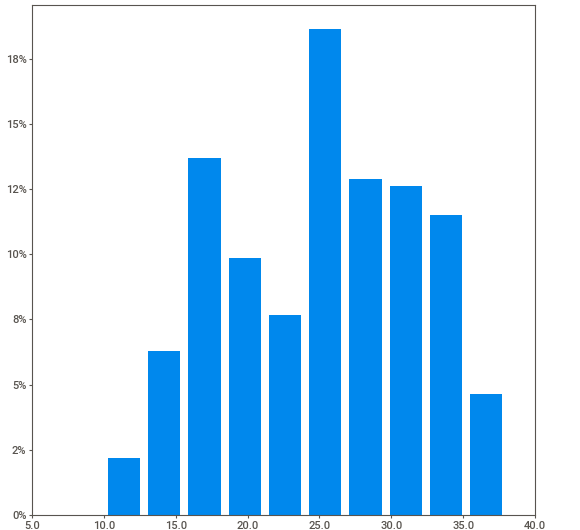
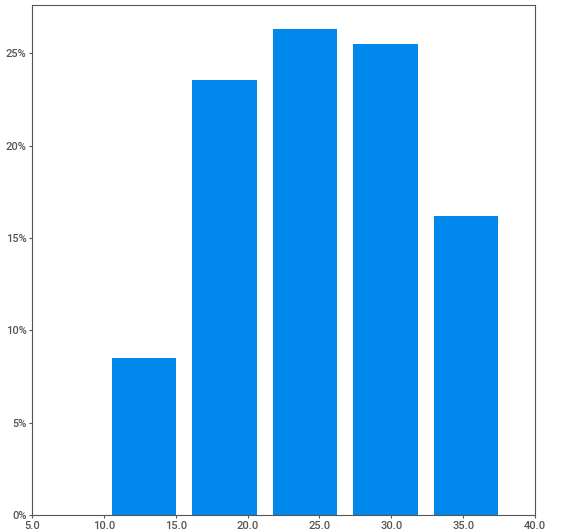
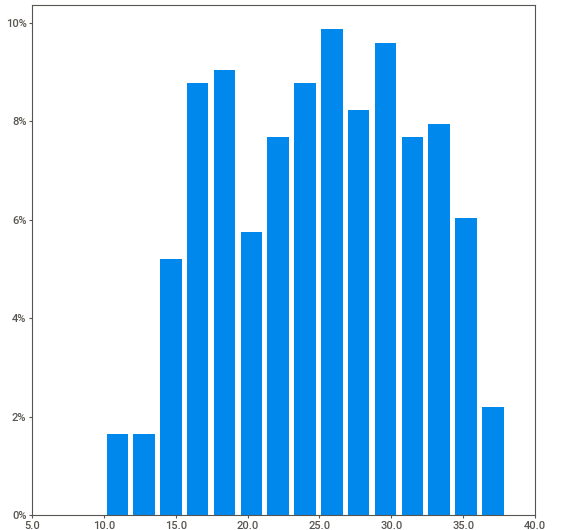
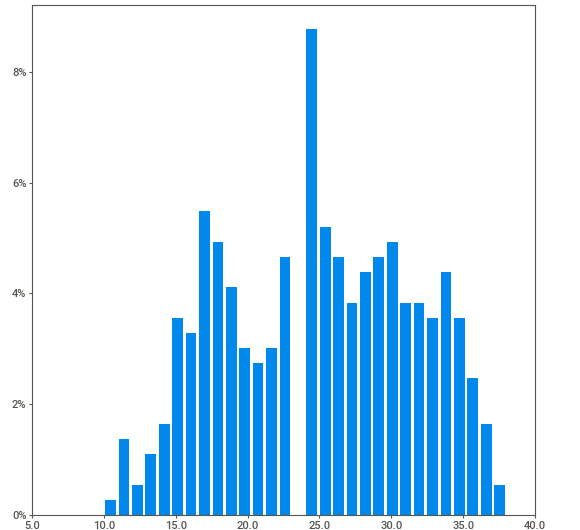
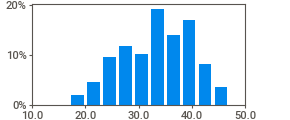
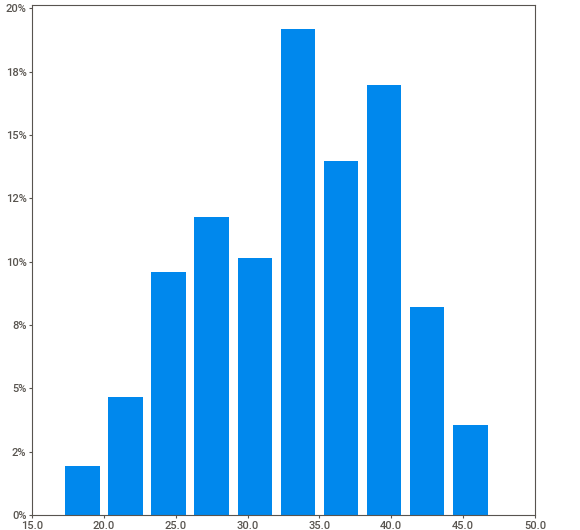
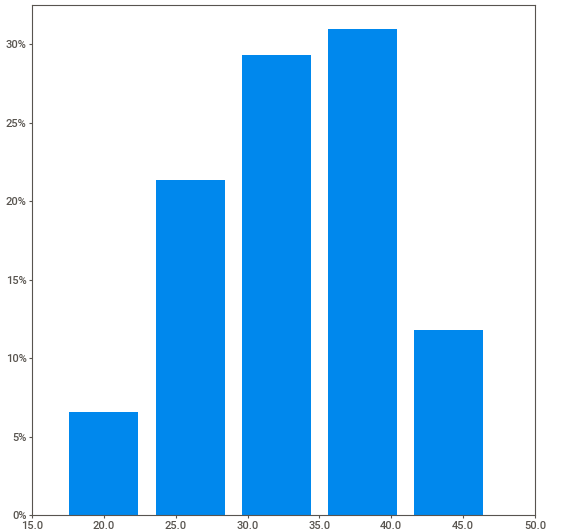
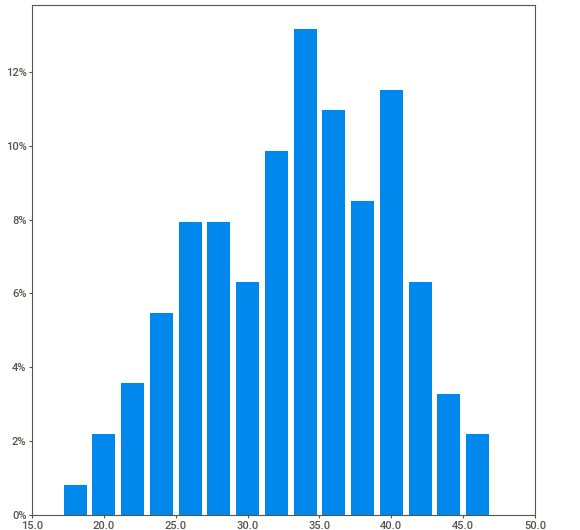
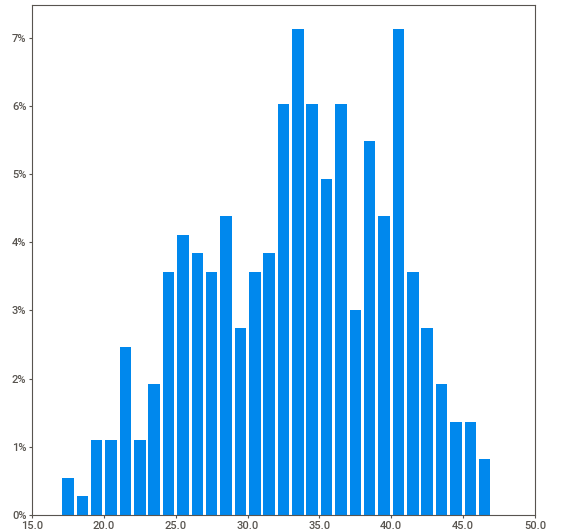
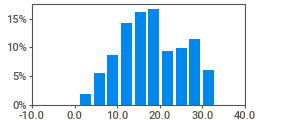
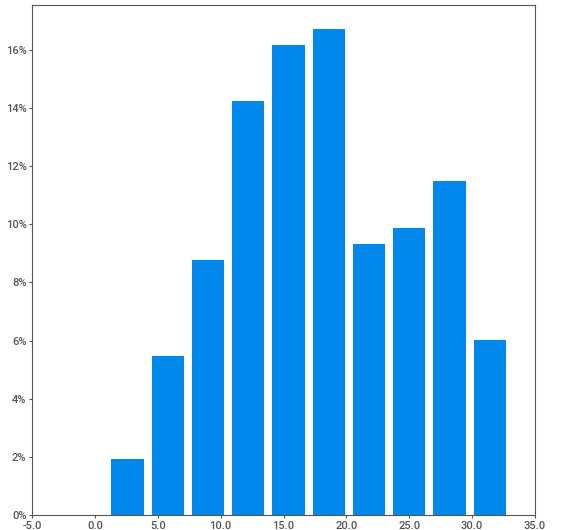
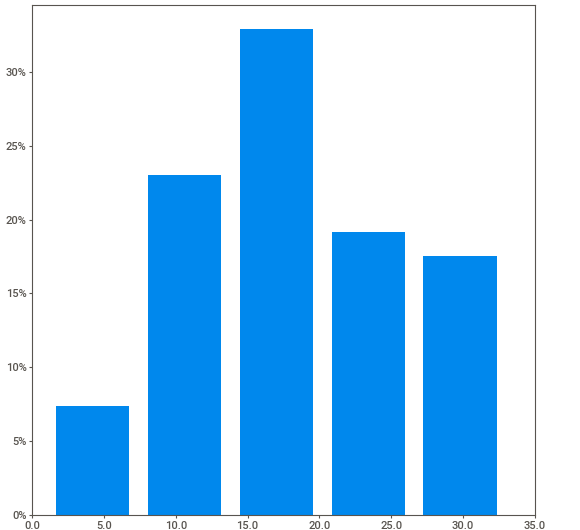
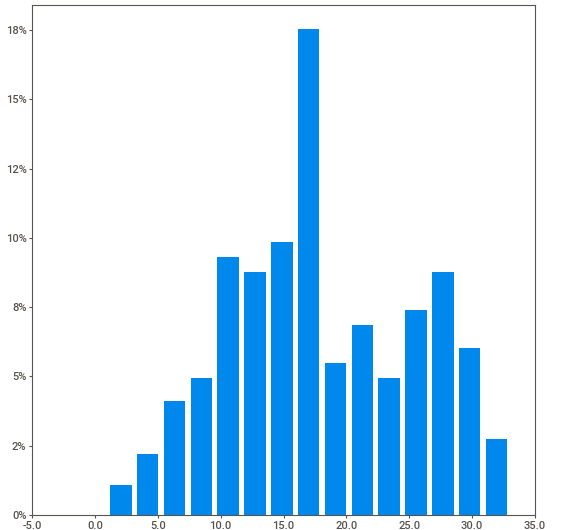
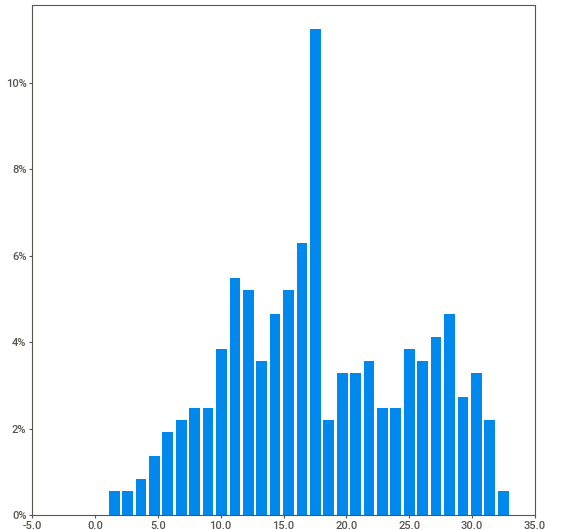
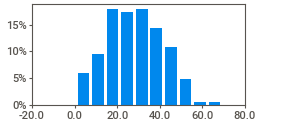
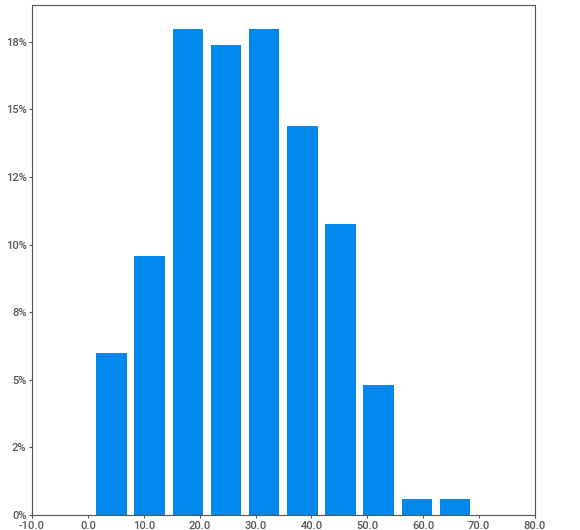
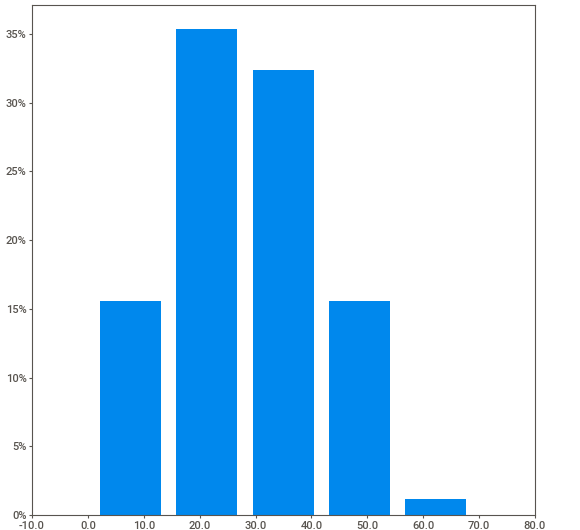
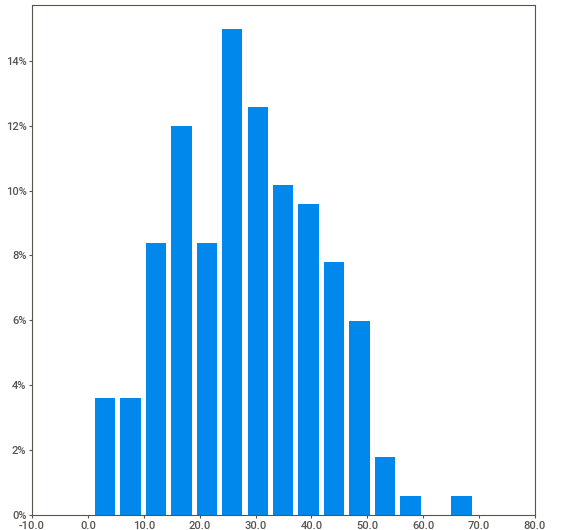
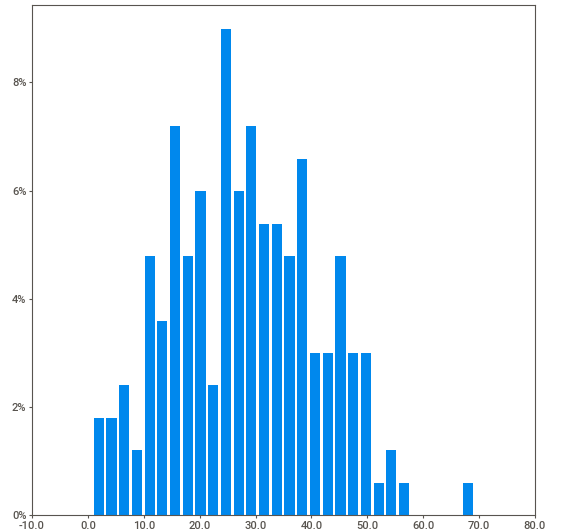
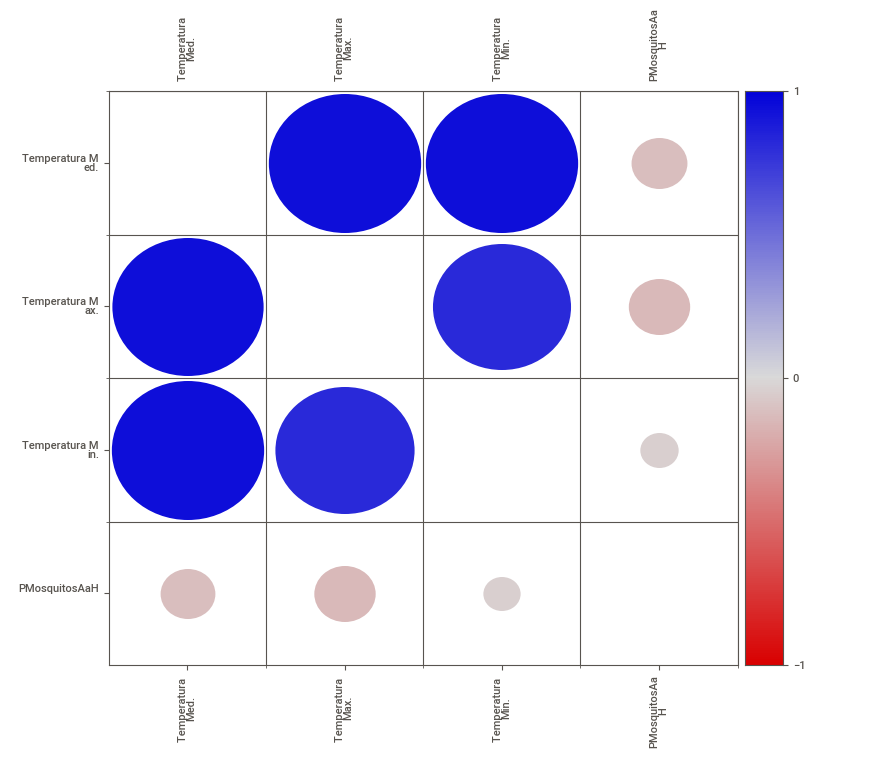
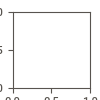

In [33]:
IPython.display.HTML('analyze.html')

                                             |          | [  0%]   00:00 -> (? left)

Report analyze1.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



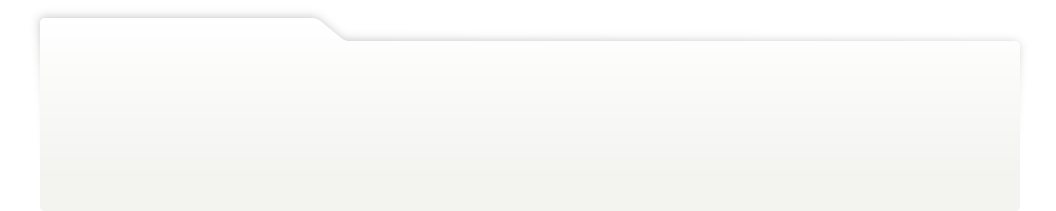
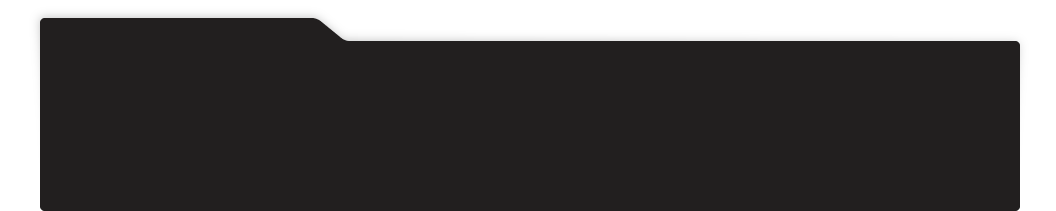
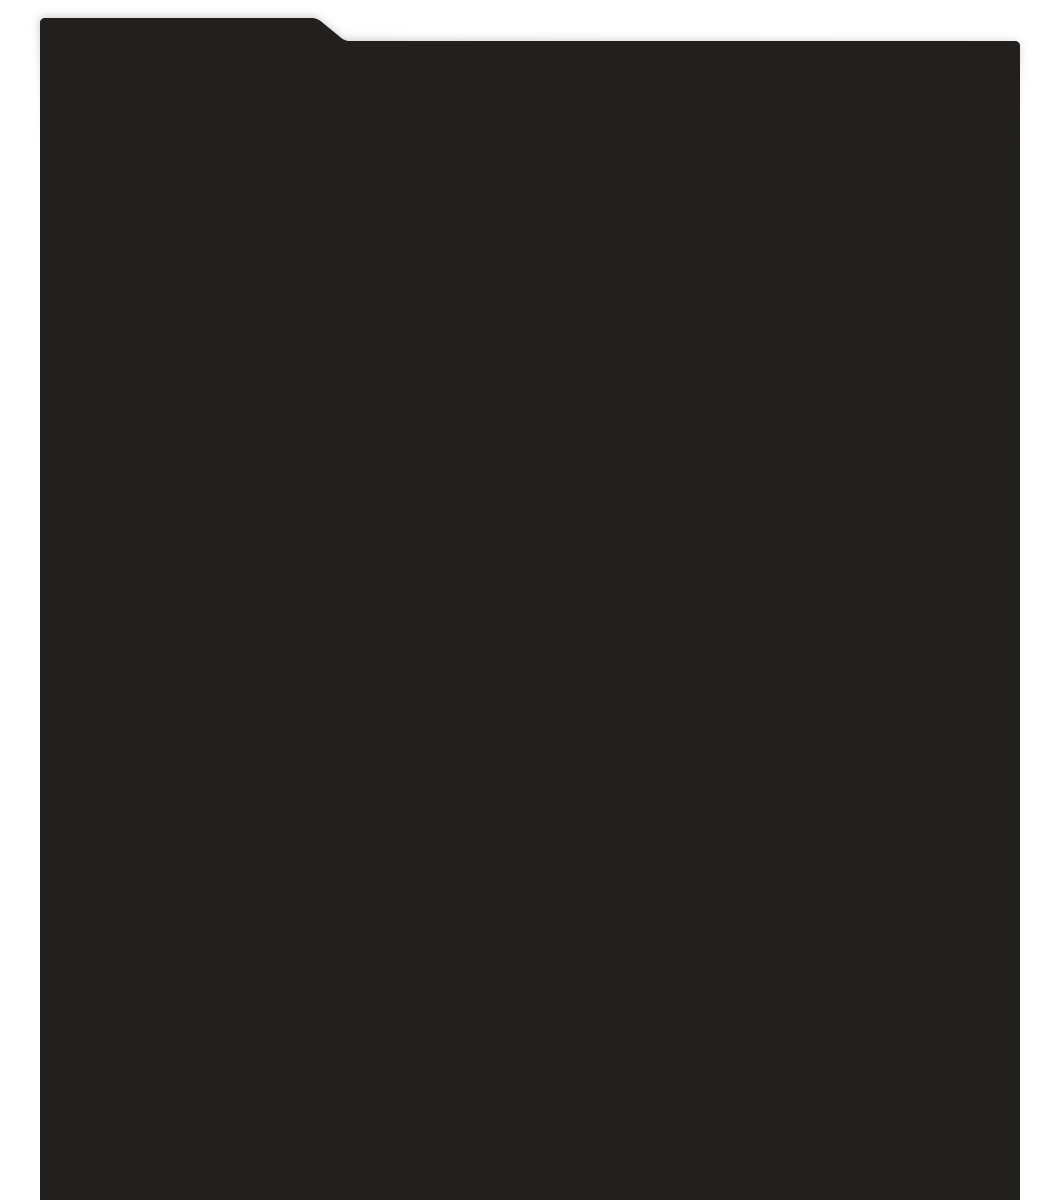
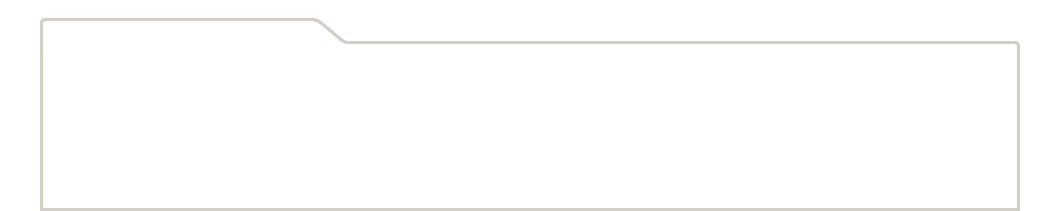
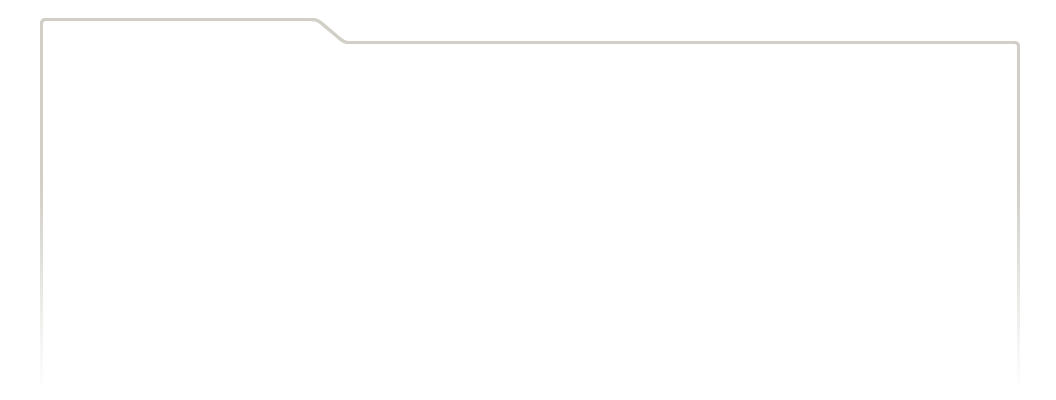
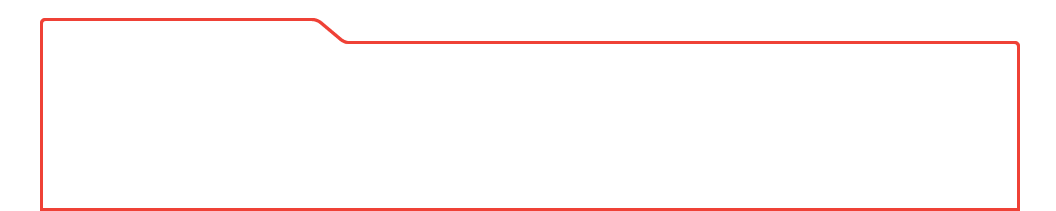
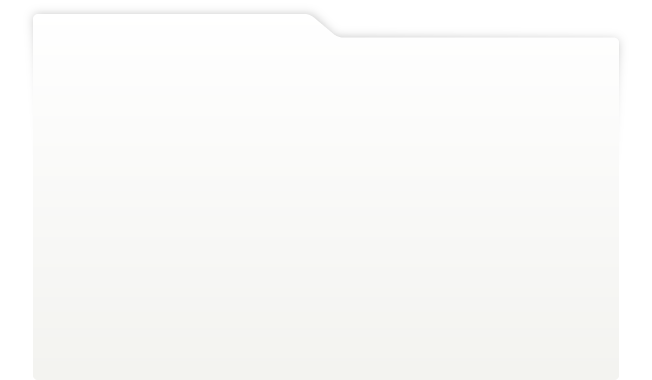
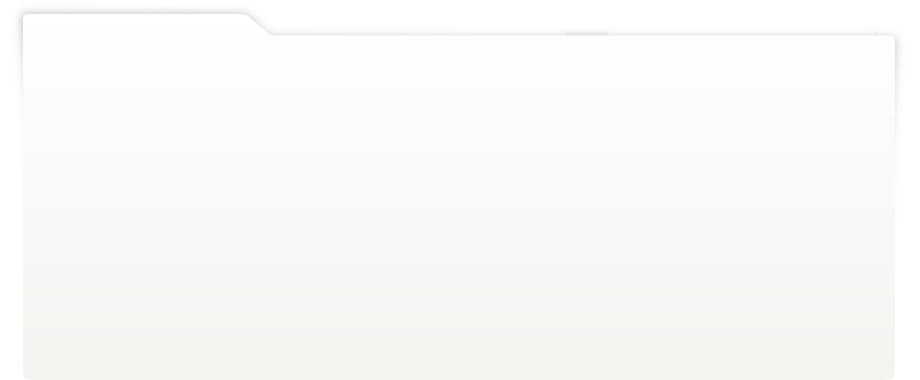
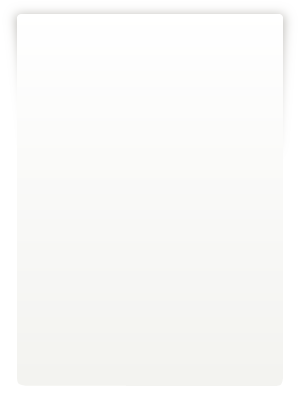
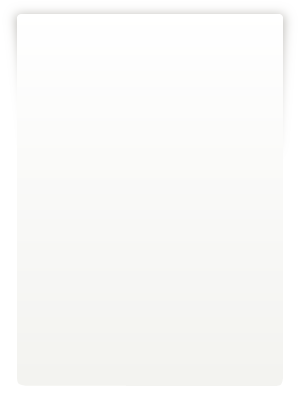
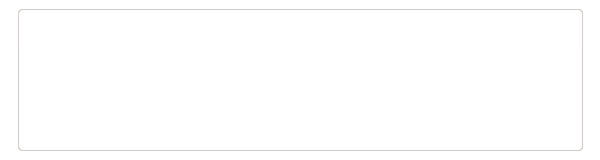
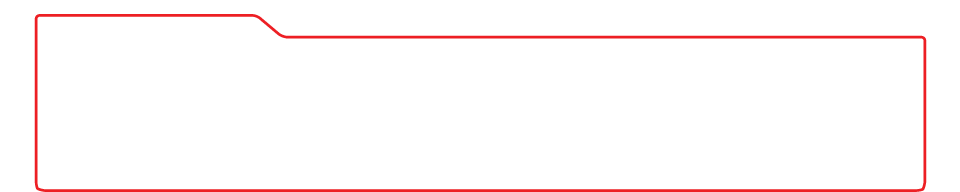
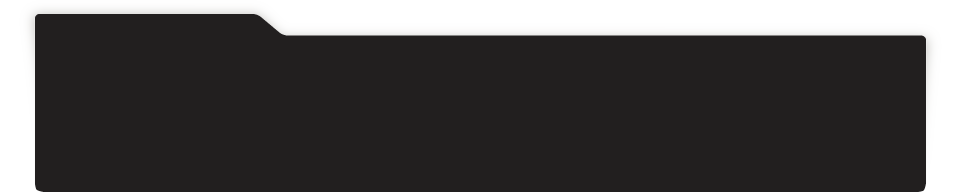
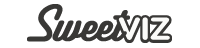
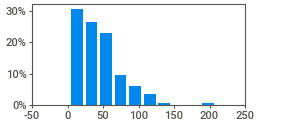
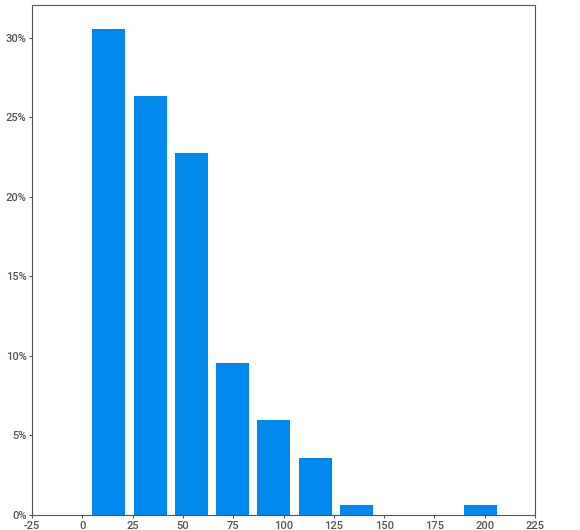
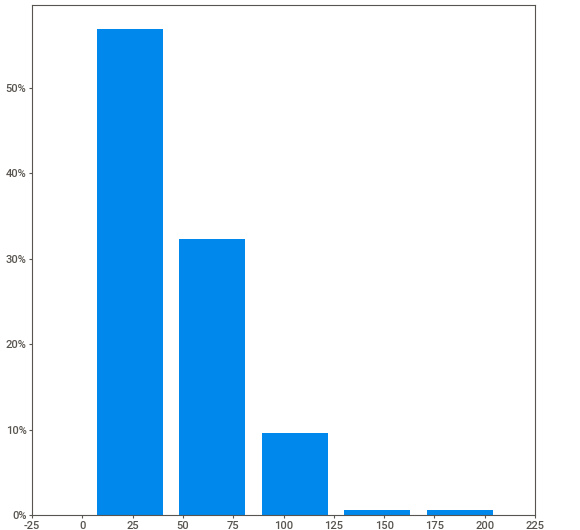
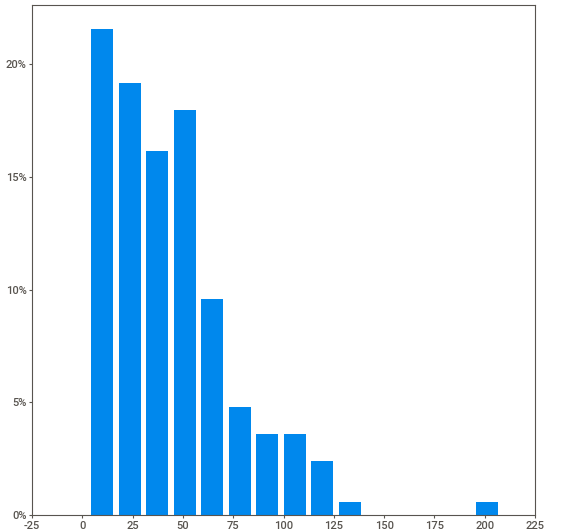
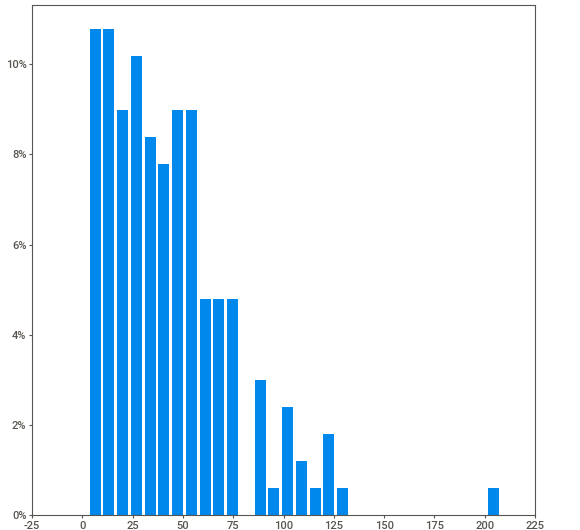
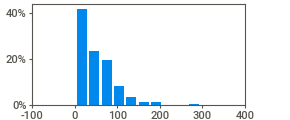
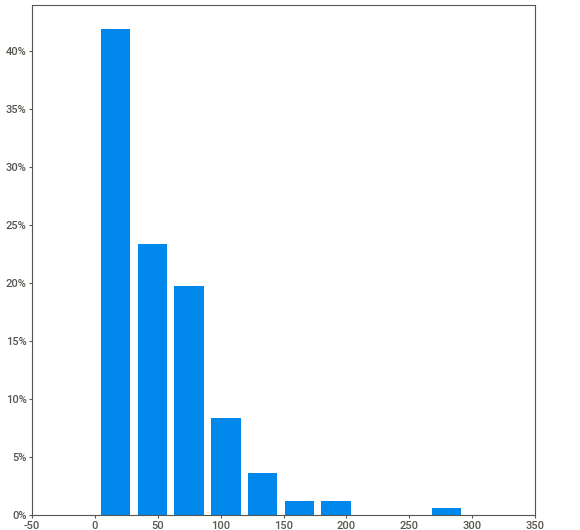
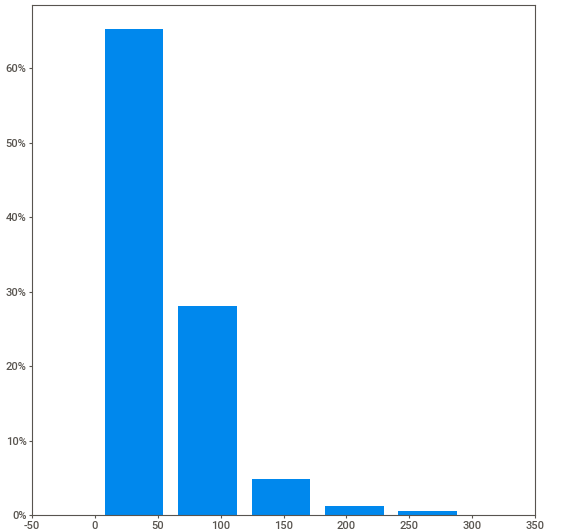
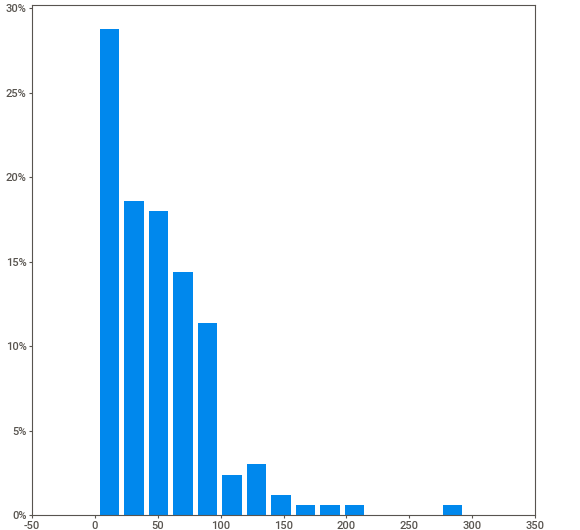
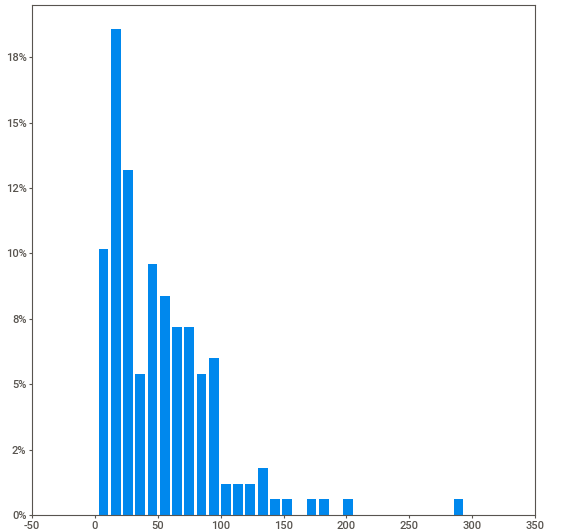
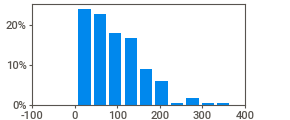
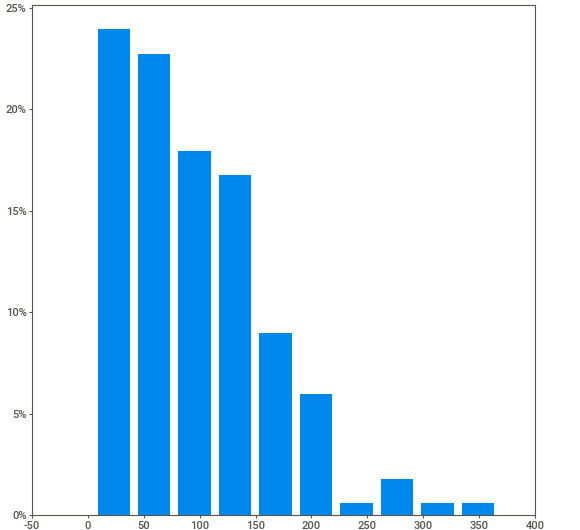
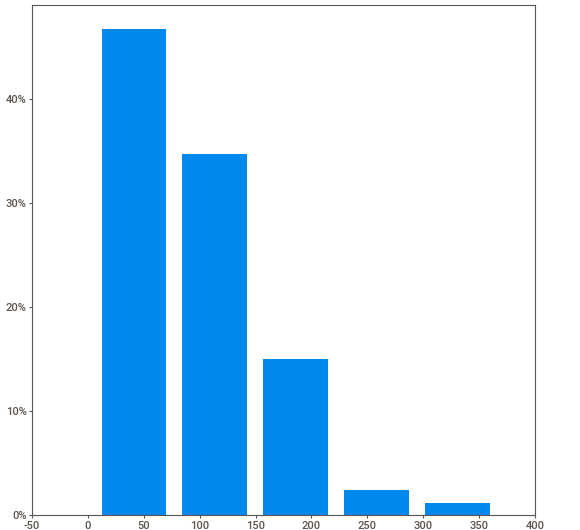
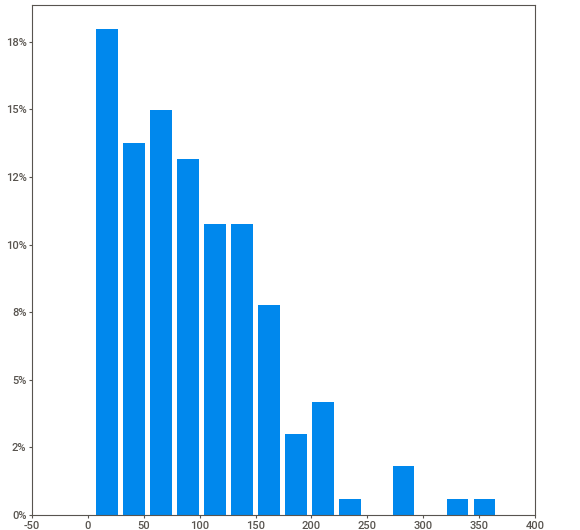
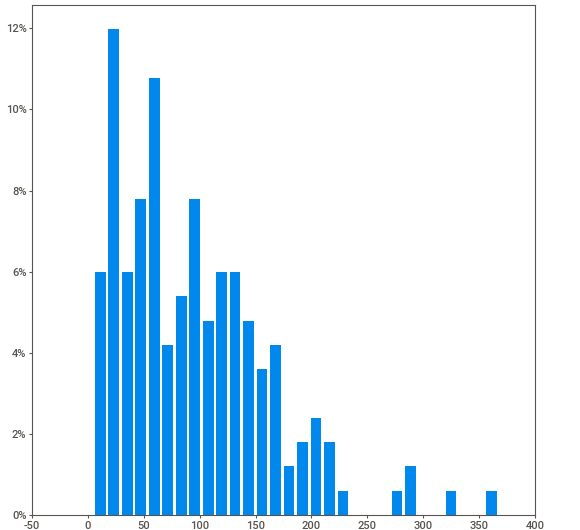
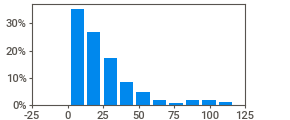
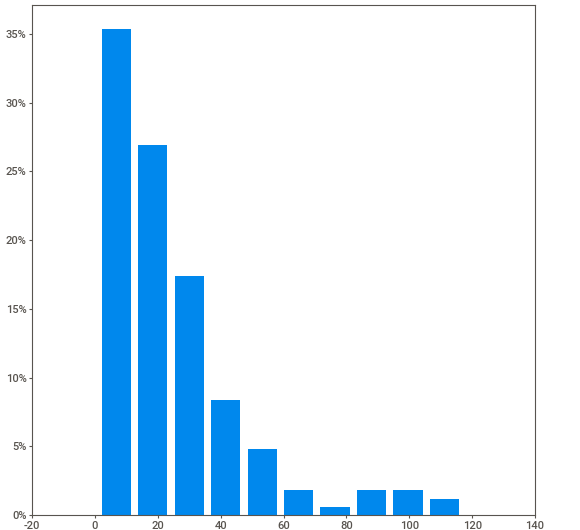
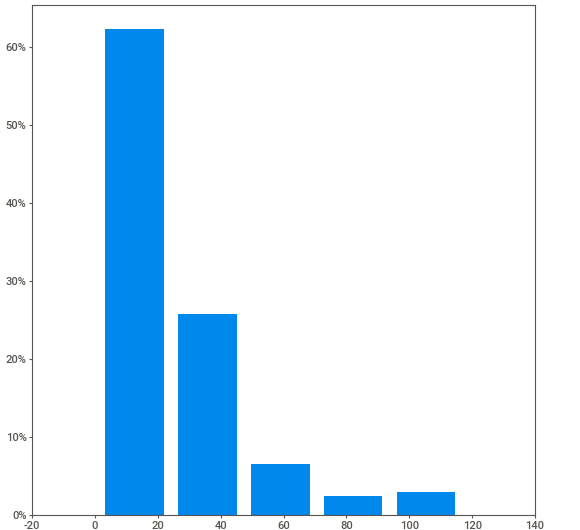
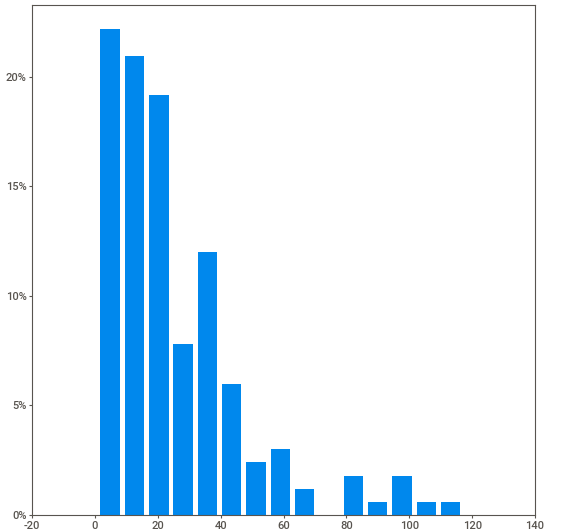
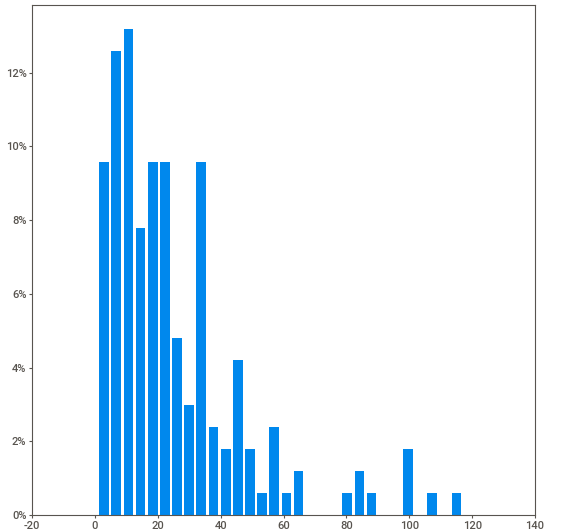
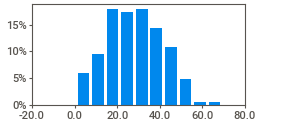
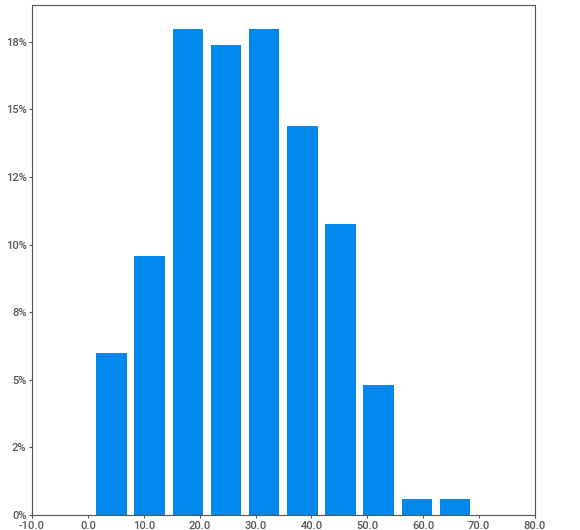
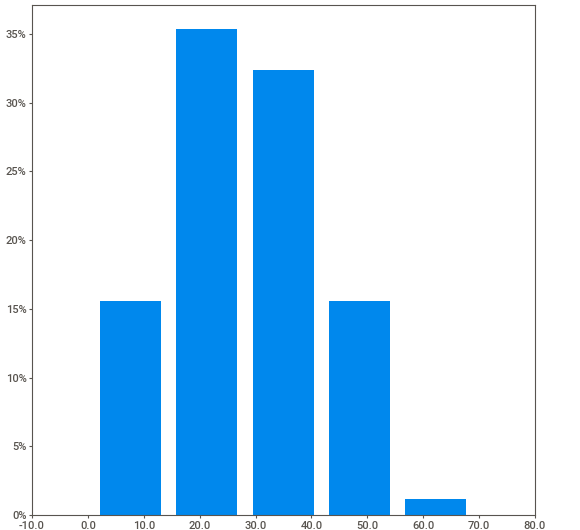
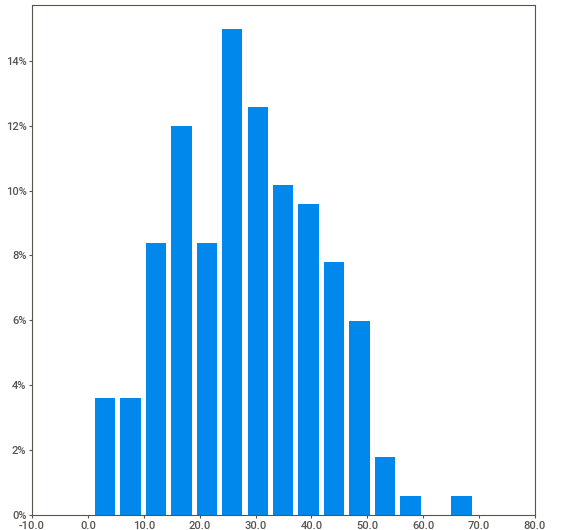
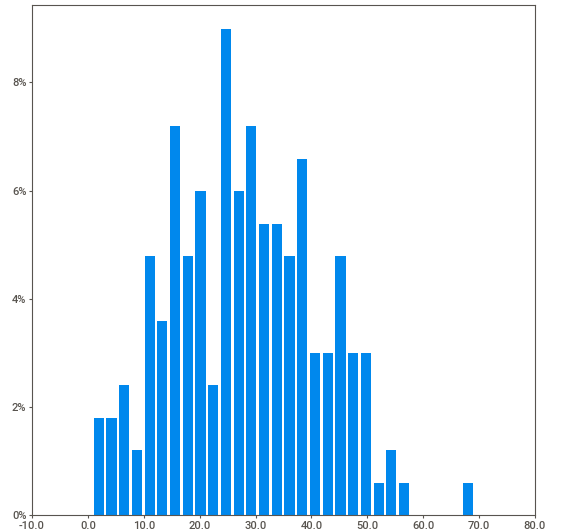
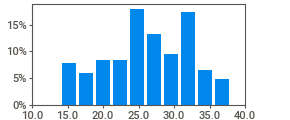
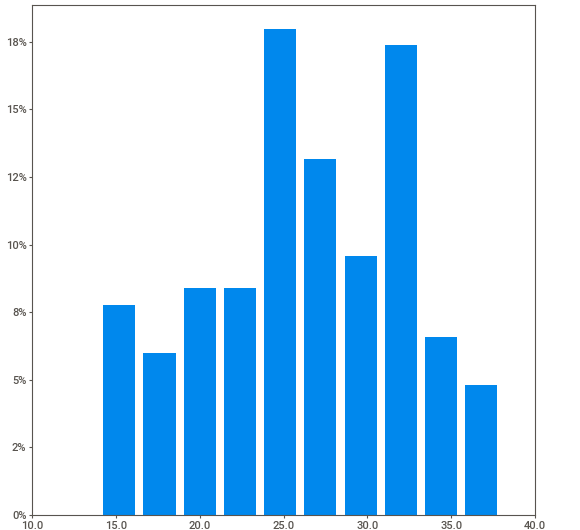
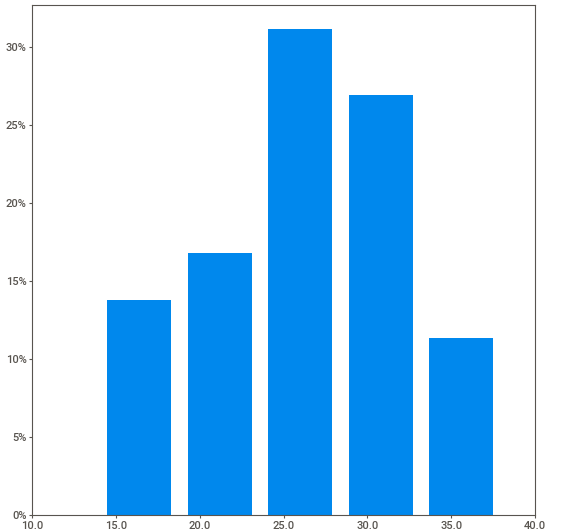
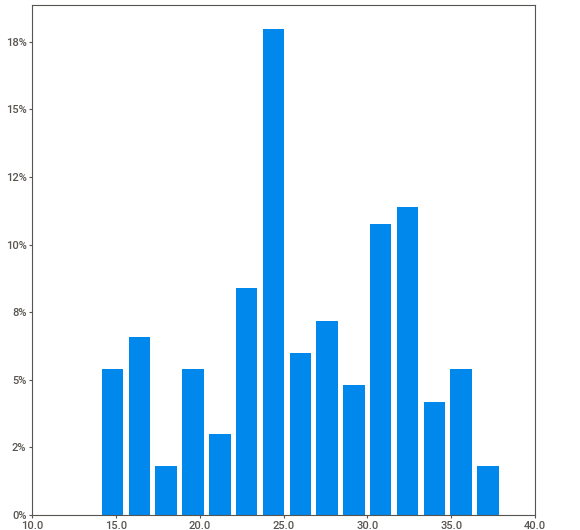
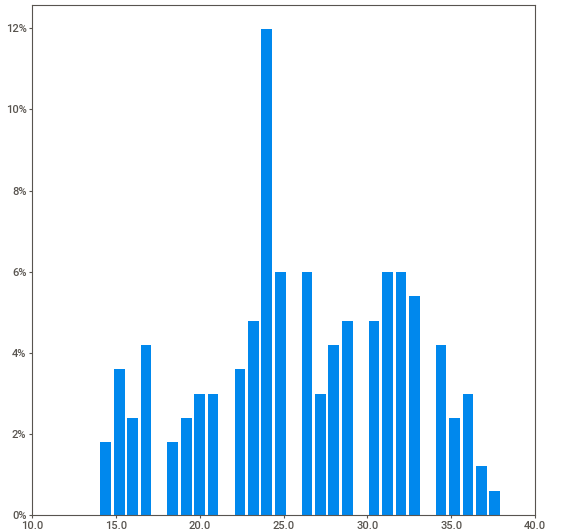
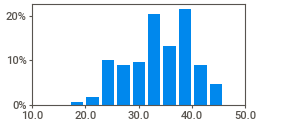
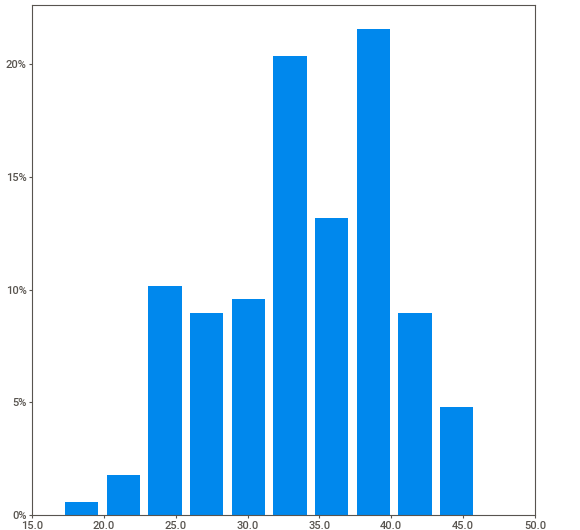
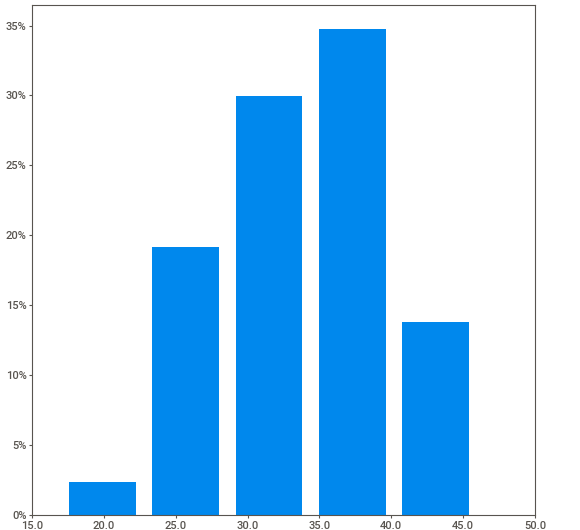
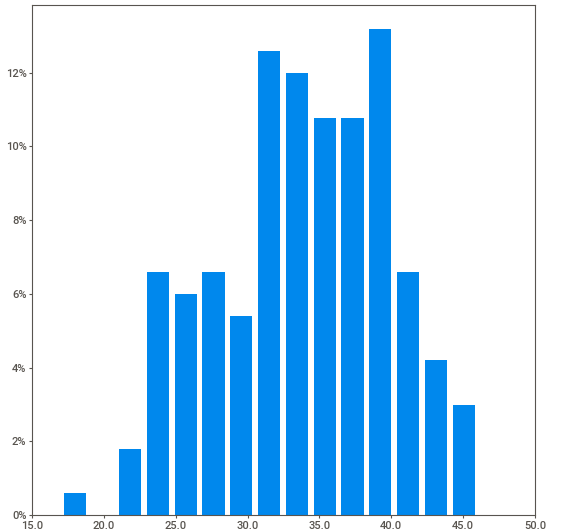
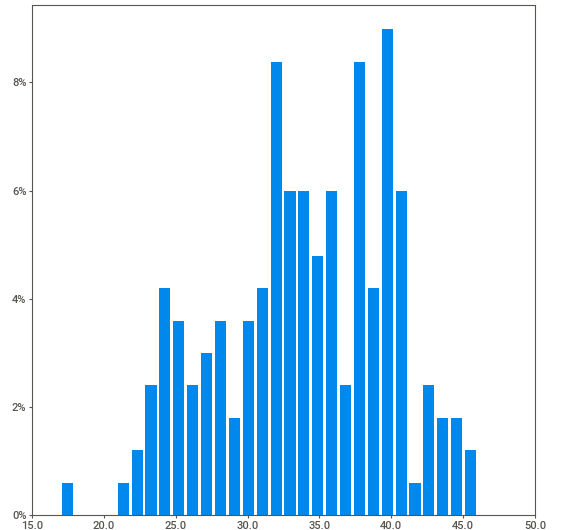
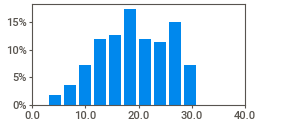
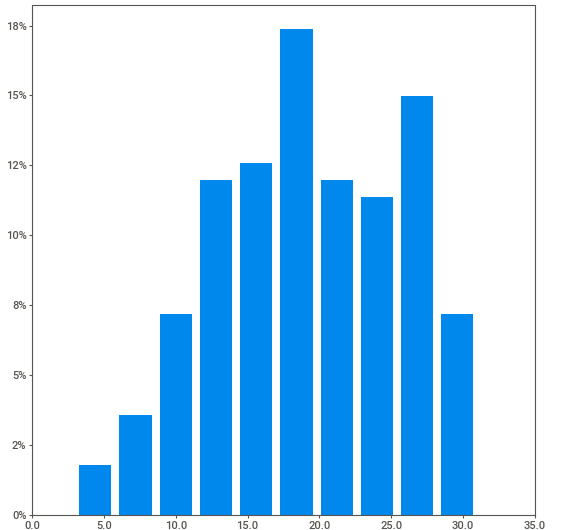
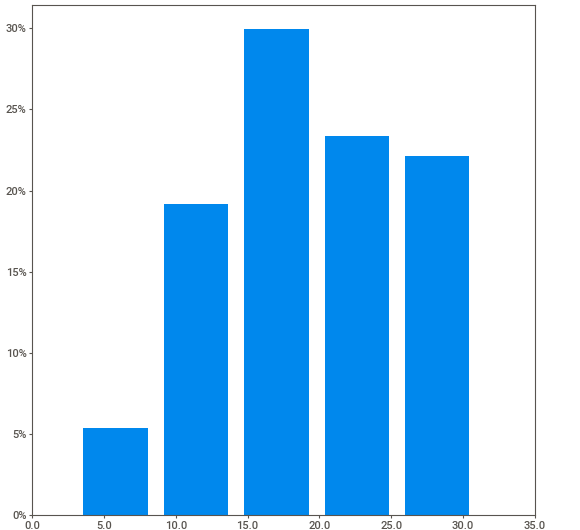
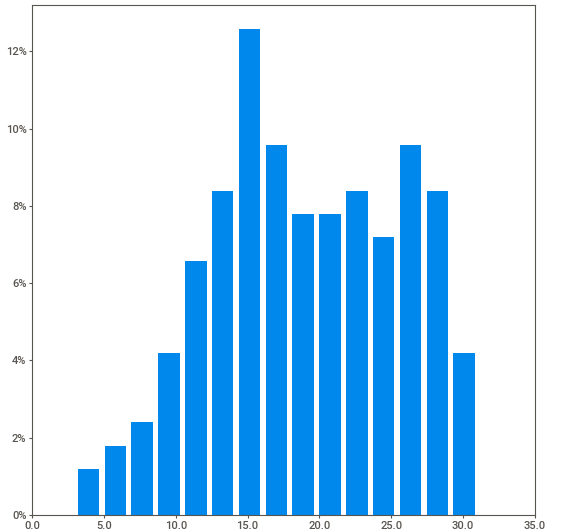
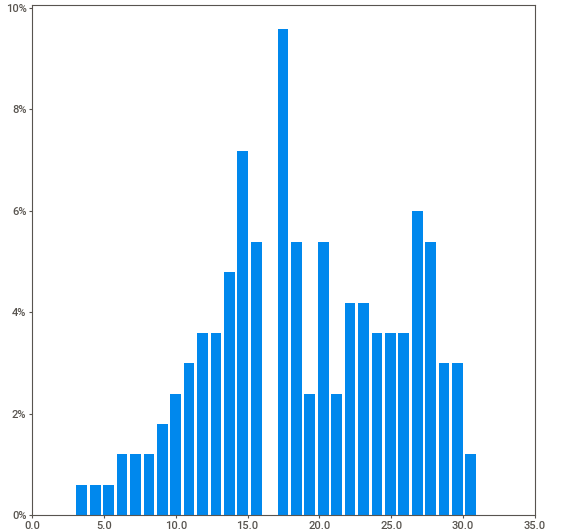
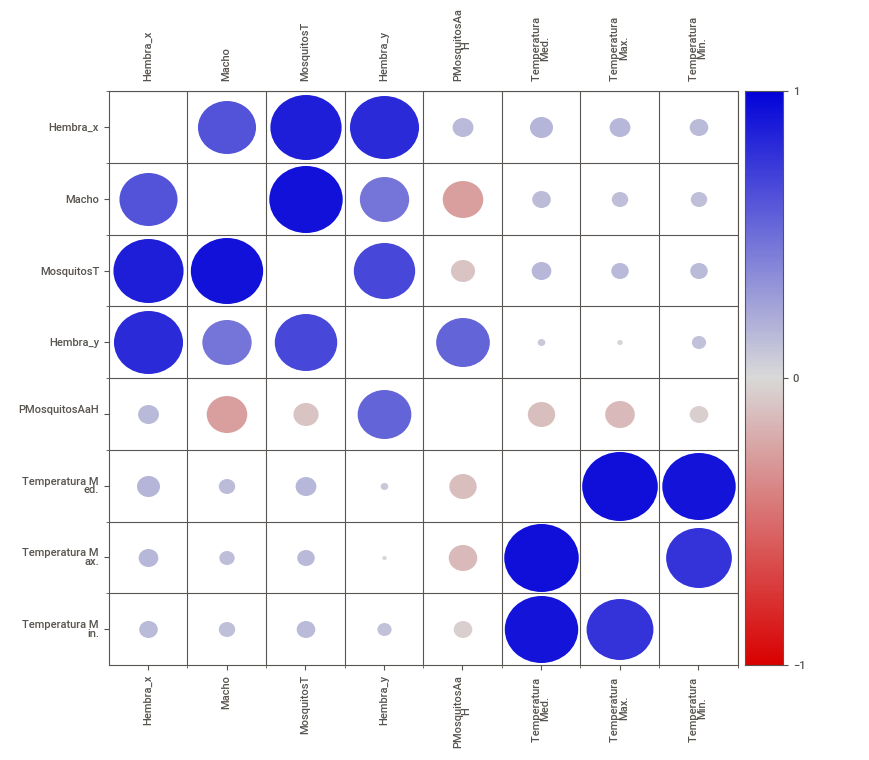
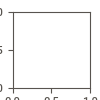

In [34]:
analyze1_report=sv.analyze(df4)
analyze1_report.show_html('analyze1.html', open_browser=True)
IPython.display.HTML('analyze1.html')

In [35]:
dfR =  df4.corr ()
dfR

,Hembra_x,Macho,MosquitosT,Hembra_y,PMosquitosAaH,Temperatura Med.,Temperatura Max.,Temperatura Min.
Hembra_x,1.000000,0.598453,0.858951,0.802901,0.109813,0.121095,0.114934,0.100130
Macho,0.598453,1.000000,0.924281,0.436467,-0.317904,0.087832,0.079134,0.077745
MosquitosT,0.858951,0.924281,1.000000,0.661510,-0.150867,0.113833,0.105338,0.097397
Hembra_y,0.802901,0.436467,0.661510,1.000000,0.514030,0.030083,-0.022136,0.066224
PMosquitosAaH,0.109813,-0.317904,-0.150867,0.514030,1.000000,-0.171890,-0.202014,-0.098232
Temperatura Med.,0.121095,0.087832,0.113833,0.030083,-0.171890,1.000000,0.933105,0.922147
Temperatura Max.,0.114934,0.079134,0.105338,-0.022136,-0.202014,0.933105,1.000000,0.760058
Temperatura Min.,0.100130,0.077745,0.097397,0.066224,-0.098232,0.922147,0.760058,1.000000


#Primera conclusion 

No se encontro una relacion entre la frecuensia de mosquitos hembra de aedes aegypti a lo largo del tiempo en comparcion con las temperaturas ambientales. 

No hay una relacion fuerte entre los datos de mosquitos con respecto a los datos de temoeratura 

# Analisis de datos de taxonomia de mosquitos en relaccion al porcentage de mosquitos trasmisores de dengue por sectores

en esta segunda parte se calcurala la frecuencia relativa de mosquitos hembra de aedes aegipti distribuida en la localidad de Hermosillo dividido por sectores para encontrar cuales tienen más riesgo de presentar este mosquito vector de enfermedades ( Dengue, Zika y/o Chikyngunya)


limpiamos datos y escojemos las columnas que se utilizaran para el analisis


---



In [36]:
dfs= df.drop(columns =
              ['Dengue','Fecha de análisis (PCR/RAMP)','Chikungunya','Zika','Virus del Oeste del Nilo','Jurisdicción','Clave LESP','Manzana','Fecha de recepción','Fecha de colecta','Fecha de diagnóstico', ])
dfs

,Localidad,Sector,Diagnóstico,Hembra,Macho
0,Guaymas,1050.0,Aedes vexans,2.0,1.0
1,NaN,NaN,Culex quinquefasciatus,1.0,1.0
2,Guaymas,San Marino,Aedes vexans,27.0,2.0
3,Guaymas,Aranjuez,Culex quinquefasciatus,17.0,5.0
4,Hermosillo,580.0,Aedes aegypti,NaN,1.0
...,...,...,...,...,...
1918,Hermosillo,351.0,Aedes aegypti,1.0,NaN
1919,Hermosillo,351.0,Aedes aegypti,8.0,6.0
1920,NaN,NaN,Culex quinquefasciatus,1.0,1.0
1921,Hermosillo,351.0,Aedes aegypti,2.0,2.0


rellenamos los espacios basios con el valor superior inmediato el cual es el que corresponde pero no se completa por el capturista responsable de esta base de datos

In [37]:
dfs = dfs.fillna(method="pad")
dfs

,Localidad,Sector,Diagnóstico,Hembra,Macho
0,Guaymas,1050.0,Aedes vexans,2.0,1.0
1,Guaymas,1050.0,Culex quinquefasciatus,1.0,1.0
2,Guaymas,San Marino,Aedes vexans,27.0,2.0
3,Guaymas,Aranjuez,Culex quinquefasciatus,17.0,5.0
4,Hermosillo,580.0,Aedes aegypti,17.0,1.0
...,...,...,...,...,...
1918,Hermosillo,351.0,Aedes aegypti,1.0,2.0
1919,Hermosillo,351.0,Aedes aegypti,8.0,6.0
1920,Hermosillo,351.0,Culex quinquefasciatus,1.0,1.0
1921,Hermosillo,351.0,Aedes aegypti,2.0,2.0


se filtra para solo tener la localidad de hermosillo

In [38]:
dfs_mask = dfs['Localidad']=='Hermosillo'
dfsh = dfs[dfs_mask]

dfsh

,Localidad,Sector,Diagnóstico,Hembra,Macho
4,Hermosillo,580.0,Aedes aegypti,17.0,1.0
5,Hermosillo,580.0,Culex quinquefasciatus,17.0,1.0
6,Hermosillo,538.0,Aedes aegypti,1.0,1.0
7,Hermosillo,538.0,Culex quinquefasciatus,2.0,1.0
8,Hermosillo,583.0,Muestra Repetida,2.0,1.0
...,...,...,...,...,...
1918,Hermosillo,351.0,Aedes aegypti,1.0,2.0
1919,Hermosillo,351.0,Aedes aegypti,8.0,6.0
1920,Hermosillo,351.0,Culex quinquefasciatus,1.0,1.0
1921,Hermosillo,351.0,Aedes aegypti,2.0,2.0


creamos una columna que sea el total de mosquitos muestreados 

In [39]:
dfsh['MosquitosT'] = dfsh['Hembra'] + dfsh['Macho']

#dfsh.info()
dfsh

<ipython-input-39-63e9fa49c17c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfsh['MosquitosT'] = dfsh['Hembra'] + dfsh['Macho']


,Localidad,Sector,Diagnóstico,Hembra,Macho,MosquitosT
4,Hermosillo,580.0,Aedes aegypti,17.0,1.0,18.0
5,Hermosillo,580.0,Culex quinquefasciatus,17.0,1.0,18.0
6,Hermosillo,538.0,Aedes aegypti,1.0,1.0,2.0
7,Hermosillo,538.0,Culex quinquefasciatus,2.0,1.0,3.0
8,Hermosillo,583.0,Muestra Repetida,2.0,1.0,3.0
...,...,...,...,...,...,...
1918,Hermosillo,351.0,Aedes aegypti,1.0,2.0,3.0
1919,Hermosillo,351.0,Aedes aegypti,8.0,6.0,14.0
1920,Hermosillo,351.0,Culex quinquefasciatus,1.0,1.0,2.0
1921,Hermosillo,351.0,Aedes aegypti,2.0,2.0,4.0


creamos un dataframe nuevo que tenga solo los datos de la especie aedes aegypti que es el vector de dengue 

In [40]:
dfsh1_mask = dfsh['Diagnóstico']=='Aedes aegypti'
dfsaa = dfsh[dfsh1_mask]

dfsaa

,Localidad,Sector,Diagnóstico,Hembra,Macho,MosquitosT
4,Hermosillo,580.0,Aedes aegypti,17.0,1.0,18.0
6,Hermosillo,538.0,Aedes aegypti,1.0,1.0,2.0
9,Hermosillo,580.0,Aedes aegypti,2.0,1.0,3.0
10,Hermosillo,583.0,Aedes aegypti,2.0,1.0,3.0
12,Hermosillo,490.0,Aedes aegypti,1.0,1.0,2.0
...,...,...,...,...,...,...
1915,Hermosillo,336.0,Aedes aegypti,7.0,2.0,9.0
1916,Hermosillo,336.0,Aedes aegypti,3.0,2.0,5.0
1918,Hermosillo,351.0,Aedes aegypti,1.0,2.0,3.0
1919,Hermosillo,351.0,Aedes aegypti,8.0,6.0,14.0


ahora se agrupan los dataframes por sector y que solo aparecta un sector por entrada para poder compararlos entre ellos

In [41]:
dfsaa2 = dfsaa.groupby('Sector').sum()


dfsh2 = dfsh.groupby('Sector').sum()
dfsh2

,Hembra,Macho,MosquitosT
Sector,,,
270.0,3.0,3.0,6.0
336.0,67.0,93.0,160.0
337.0,96.0,151.0,247.0
338.0,10.0,18.0,28.0
339.0,35.0,48.0,83.0
...,...,...,...
1360.0,5.0,6.0,11.0
1361.0,6.0,9.0,15.0
1365.0,6.0,8.0,14.0


In [42]:
dfsaa2.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 188 entries, 336.0 to 1375.0
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Hembra      188 non-null    float64
 1   Macho       188 non-null    float64
 2   MosquitosT  188 non-null    float64
dtypes: float64(3)
memory usage: 5.9 KB


se combinan los dos dataframes para tener la columna de total de mosquitos y la columna de solo hermbras de aedes aegypti que es el tipo de mosquito que propaga las enfermedades de interes 

In [43]:
dfs3 = pd.merge(dfsh2, dfsaa2["Hembra"], how="left", on="Sector")

dfs3
dfs3.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 192 entries, 270.0 to 1375.0
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Hembra_x    192 non-null    float64
 1   Macho       192 non-null    float64
 2   MosquitosT  192 non-null    float64
 3   Hembra_y    188 non-null    float64
dtypes: float64(4)
memory usage: 7.5 KB


ahora se puede calcular la proporcion de mosquito vector con respecto al total de mosquitos 

In [44]:
dfs3['PMosquitosAaH'] = (dfs3['Hembra_y'] / dfs3['MosquitosT'])
#dfs3['PMosquitosAaH'] = pd.to_numeric(dfs3['PMosquitosAaH'],errors = 'coerce')
dfs3.describe()
dfs3 = dfs3.fillna(0)
dfs3.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 192 entries, 270.0 to 1375.0
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Hembra_x       192 non-null    float64
 1   Macho          192 non-null    float64
 2   MosquitosT     192 non-null    float64
 3   Hembra_y       192 non-null    float64
 4   PMosquitosAaH  192 non-null    float64
dtypes: float64(5)
memory usage: 9.0 KB


In [45]:
dfs4=dfs3.sort_values(by=['PMosquitosAaH'])
dfs4.describe()

,Hembra_x,Macho,MosquitosT,Hembra_y,PMosquitosAaH
count,192.000000,192.000000,192.000000,192.000000,192.000000
mean,37.552083,45.072917,82.625000,22.010417,0.313319
std,48.699284,63.628379,109.387562,29.665498,0.161700
min,1.000000,1.000000,2.000000,0.000000,0.000000
25%,8.750000,10.000000,20.000000,5.750000,0.206653
50%,20.000000,27.000000,50.500000,11.500000,0.302174
75%,47.250000,57.000000,105.000000,26.000000,0.409382
max,323.000000,451.000000,774.000000,190.000000,0.833333


acomodo de los sectores por porporcionde mosquitos vector de dengue 

In [46]:
#plt.hist (dfs4['PMosquitosAaH'])
#plt.show()
plt.figure(figsize=(70,200))
dfs4['PMosquitosAaH'].plot(kind = 'barh')


In [47]:
dfs4.tail(10)

,Hembra_x,Macho,MosquitosT,Hembra_y,PMosquitosAaH
Sector,,,,,
572.0,18.0,8.0,26.0,16.0,0.615385
446.0,18.0,9.0,27.0,17.0,0.629630
543.0,2.0,1.0,3.0,2.0,0.666667
435.0,2.0,1.0,3.0,2.0,0.666667
1348.0,117.0,45.0,162.0,108.0,0.666667
454.0,4.0,2.0,6.0,4.0,0.666667
478.0,7.0,3.0,10.0,7.0,0.700000
362.0,8.0,3.0,11.0,8.0,0.727273
574.0,8.0,2.0,10.0,8.0,0.800000


# Georreferenciación de sectores

In [48]:
import geopandas as gpd
from fiona.drvsupport import supported_drivers
supported_drivers['KML'] = 'rw'

In [51]:
gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'
geo8 = gpd.read_file('DTTO_08.kml', driver='KML')
#geo8


AttributeError: ignored